# [Dataset Description](https://www.kaggle.com/competitions/instacart-market-basket-analysis/data)

# Data Preprocessing

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename) 
        print(path.ljust(100), os.path.getsize(path) // int(1e6), 'MB')

/kaggle/input/instacart-market-basket-analysis/departments.csv.zip                                   0 MB
/kaggle/input/instacart-market-basket-analysis/sample_submission.csv.zip                             0 MB
/kaggle/input/instacart-market-basket-analysis/order_products__train.csv.zip                         7 MB
/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv.zip                         164 MB
/kaggle/input/instacart-market-basket-analysis/orders.csv.zip                                        32 MB
/kaggle/input/instacart-market-basket-analysis/products.csv.zip                                      0 MB
/kaggle/input/instacart-market-basket-analysis/aisles.csv.zip                                        0 MB


In [3]:
!unzip -o -d /kaggle/working/ /kaggle/input/instacart-market-basket-analysis/departments.csv.zip
!unzip -o -d /kaggle/working/ /kaggle/input/instacart-market-basket-analysis/sample_submission.csv.zip
!unzip -o -d /kaggle/working/ /kaggle/input/instacart-market-basket-analysis/order_products__train.csv.zip
!unzip -o -d /kaggle/working/ /kaggle/input/instacart-market-basket-analysis/order_products__prior.csv.zip
!unzip -o -d /kaggle/working/ /kaggle/input/instacart-market-basket-analysis/orders.csv.zip
!unzip -o -d /kaggle/working/ /kaggle/input/instacart-market-basket-analysis/products.csv.zip
!unzip -o -d /kaggle/working/ /kaggle/input/instacart-market-basket-analysis/aisles.csv.zip

Archive:  /kaggle/input/instacart-market-basket-analysis/departments.csv.zip
  inflating: /kaggle/working/departments.csv  
   creating: /kaggle/working/__MACOSX/
  inflating: /kaggle/working/__MACOSX/._departments.csv  
Archive:  /kaggle/input/instacart-market-basket-analysis/sample_submission.csv.zip
  inflating: /kaggle/working/sample_submission.csv  
Archive:  /kaggle/input/instacart-market-basket-analysis/order_products__train.csv.zip
  inflating: /kaggle/working/order_products__train.csv  
  inflating: /kaggle/working/__MACOSX/._order_products__train.csv  
Archive:  /kaggle/input/instacart-market-basket-analysis/order_products__prior.csv.zip
  inflating: /kaggle/working/order_products__prior.csv  
  inflating: /kaggle/working/__MACOSX/._order_products__prior.csv  
Archive:  /kaggle/input/instacart-market-basket-analysis/orders.csv.zip
  inflating: /kaggle/working/orders.csv  
  inflating: /kaggle/working/__MACOSX/._orders.csv  
Archive:  /kaggle/input/instacart-market-basket-anal

In [4]:
dir_path = '/kaggle/working'
order_products_train = pd.read_csv(f'{dir_path}/order_products__train.csv')
order_products_prior = pd.read_csv(f'{dir_path}/order_products__prior.csv')
orders      = pd.read_csv(f'{dir_path}/orders.csv')
products    = pd.read_csv(f'{dir_path}/products.csv')
aisles      = pd.read_csv(f'{dir_path}/aisles.csv')
departments = pd.read_csv(f'{dir_path}/departments.csv')

In [5]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
full_products = products.copy()
full_products = pd.merge(full_products, aisles,               on='aisle_id',      how='left')
full_products = pd.merge(full_products, departments,          on='department_id', how='left')
order_products_train = pd.merge(order_products_train, orders, on='order_id',      how='left')
order_products_prior = pd.merge(order_products_prior, orders, on='order_id',      how='left')
train         = pd.merge(order_products_train, full_products, on='product_id',    how='left')
test          = pd.merge(order_products_prior, full_products, on='product_id',    how='left')

In [12]:
train.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


In [13]:
test.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [14]:
print(f'train.shape: {train.shape}')
print(f'test.shape : {test.shape}')

train.shape: (1384617, 15)
test.shape : (32434489, 15)


In [15]:
def df_dtypes(df):
    pd.set_option('display.max_colwidth', None)

    df_dtypes = df.columns.groupby(df.dtypes)
    df_dtypes = pd.DataFrame({
        'dtype':     list(df_dtypes.keys()),
        '# columns': [len(df_dtypes[key])  for key in df_dtypes.keys()],
        'columns':   [list(df_dtypes[key]) for key in df_dtypes.keys()],
    })
    df_dtypes = df_dtypes.style.applymap(lambda x:'text-align: left', subset=['columns'])
    return df_dtypes

In [16]:
df_dtypes(train)

,dtype,# columns,columns
0,int64,10,"['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'aisle_id', 'department_id']"
1,float64,1,['days_since_prior_order']
2,object,4,"['eval_set', 'product_name', 'aisle', 'department']"


In [17]:
def compute_dtype(df):
    return [df[col].dtype                                              for col in df.columns]
def compute_count(df):
    return [df[col].count()                                            for col in df.columns]
def compute_mean(df, features):
    return [round(df[col].mean(), 1)        if col in features else '' for col in df.columns]
def compute_std(df, features):
    return [round(df[col].std(), 1)         if col in features else '' for col in df.columns]
def compute_min(df, features):
    return [round(df[col].min(), 1)         if col in features else '' for col in df.columns]
def compute_max(df, features):
    return [round(df[col].max(), 1)         if col in features else '' for col in df.columns]
def compute_quantile(df, features, percentage):
    return [round(df[col].quantile(percentage), 1) \
                                            if col in features else '' for col in df.columns]
def compute_IQR(df, features):
    return [round(df[col].max()-df[col].min(), 1) \
                                            if col in features else '' for col in df.columns]
def compute_nunique(df):
    return [df[col].nunique()                                          for col in df.columns]
def compute_unique(df, threshold):
    return [df[col].unique()  if df[col].nunique() < threshold else '' for col in df.columns]
def compute_mode(df):
    return [df[col].mode()[0]           if len(df[col].mode()) else '' for col in df.columns]
def compute_mode_count(df):
    return [df[col].value_counts().max()                               for col in df.columns]
def compute_mode_percentage(df):
    return [round(df[col].value_counts().max() * 100 / df.shape[0], 1) for col in df.columns]
def compute_null_count(df):
    return [df[col].isnull().sum()                                     for col in df.columns]
def compute_null_percentage(df):
    return [round(df[col].isnull().mean() * 100, 1)                    for col in df.columns]

In [18]:
def build_my_info_table(df, nunique_threshold=30):
    numerical_features = df.select_dtypes(include=[np.number])
    df_info = pd.DataFrame({
        '#':        np.arange(len(df.columns)),
        'column':   df.columns,
        'dtype':    compute_dtype(df),
        'count':    compute_count(df),
        'mean':     compute_mean(df, numerical_features),
        'std':      compute_std(df, numerical_features),
        'min':      compute_min(df, numerical_features),
        '25%':      compute_quantile(df, numerical_features, .25),
        '50%':      compute_quantile(df, numerical_features, .5),
        '75%':      compute_quantile(df, numerical_features, .75),
        'max':      compute_max(df, numerical_features),
        'IQR':      compute_IQR(df, numerical_features),
        'nunique':  compute_nunique(df),
        'unique':   compute_unique(df, nunique_threshold),
        'mode':     compute_mode(df),
        'mode #':   compute_mode_count(df),
        'mode %':   compute_mode_percentage(df),
        'null #':   compute_null_count(df),
        'null %':   compute_null_percentage(df),
    })
    df_info = df_info.sort_values(by='dtype')
    return df_info

In [19]:
build_my_info_table(train)

,#,column,dtype,count,mean,std,min,25%,50%,75%,max,IQR,nunique,unique,mode,mode #,mode %,null #,null %
0,0,order_id,int64,1384617,1706297.6,989732.6,1,843370.0,1701880.0,2568023.0,3421070,3421069,131209,,1395075,80,0.0,0,0.0
1,1,product_id,int64,1384617,25556.2,14121.3,1,13380.0,25298.0,37940.0,49688,49687,39123,,24852,18726,1.4,0,0.0
2,2,add_to_cart_order,int64,1384617,8.8,7.4,1,3.0,7.0,12.0,80,79,80,,1,131209,9.5,0,0.0
3,3,reordered,int64,1384617,0.6,0.5,0,0.0,1.0,1.0,1,1,2,"[1, 0]",1,828824,59.9,0,0.0
4,4,user_id,int64,1384617,103112.8,59487.1,1,51732.0,102933.0,154959.0,206209,206208,131209,,149753,80,0.0,0,0.0
6,6,order_number,int64,1384617,17.1,16.6,4,6.0,11.0,21.0,100,96,97,,4,149882,10.8,0,0.0
7,7,order_dow,int64,1384617,2.7,2.2,0,1.0,3.0,5.0,6,6,7,"[4, 6, 3, 5, 0, 1, 2]",0,324026,23.4,0,0.0
8,8,order_hour_of_day,int64,1384617,13.6,4.2,0,10.0,14.0,17.0,23,23,24,"[10, 18, 16, 20, 8, 14, 13, 21, 12, 17, 9, 15, 7, 19, 6, 11, 22, 23, 0, 4, 1, 2, 5, 3]",14,119370,8.6,0,0.0
11,11,aisle_id,int64,1384617,71.3,38.1,1,31.0,83.0,107.0,134,133,134,,83,150609,10.9,0,0.0
12,12,department_id,int64,1384617,9.8,6.3,1,4.0,8.0,16.0,21,20,21,"[16, 4, 15, 7, 20, 19, 13, 1, 12, 17, 3, 11, 9, 18, 21, 2, 14, 6, 5, 10, 8]",4,409087,29.5,0,0.0


In [20]:
def plot_bar_chart(df, x, y, xlabel, ylabel, title, xmin=None, xmax=None, palette='deep'):
    if df.shape[0] == 0:
        return
    size = (12, df.shape[0] / 4 + 1)
    plt.figure(figsize=size)
    sns.barplot(y=df[y], x=df[x], palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if not xmin and not xmax:
        xmin, xmax = df[x].min(), df[x].max()
        xrange = (xmax - xmin) * .1
        xmin, xmax = xmin-xrange, xmax+xrange
    plt.xlim(xmin, xmax)
    plt.tight_layout()
    plt.show()

In [21]:
train_info = build_my_info_table(train)
nan_df = train_info[train_info['null %'] >= 10][['column', 'null %']].sort_values(by='null %')
plot_bar_chart(nan_df, x='null %', y='column', xlabel='Null Percentage %', ylabel='Feature', title='Null Percentage in each Feature', xmin=0, xmax=100, palette='coolwarm')

In [22]:
train = train.drop(columns=list(nan_df[nan_df['null %'] > 50]['column']))
test  = test.drop(columns=list(nan_df[nan_df['null %'] > 50]['column']))

In [23]:
test_info = build_my_info_table(test)
nan_df = test_info[test_info['null %'] >= 10][['column', 'null %']].sort_values(by='null %')
plot_bar_chart(nan_df, x='null %', y='column', xlabel='Null Percentage %', ylabel='Feature', title='Null Percentage in each Feature', xmin=0, xmax=100, palette='coolwarm')

In [24]:
train = train.drop(columns=list(nan_df[nan_df['null %'] > 50]['column']))
test  = test.drop(columns=list(nan_df[nan_df['null %'] > 50]['column']))

In [25]:
def fillna(df):
    numerical_features = df.select_dtypes(include=[np.number]).columns
    df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())
    categorical_features = df.select_dtypes(exclude=[np.number]).columns
    for col in categorical_features:
        df[col] = df[col].fillna(df[col].mode()[0])

def replace_inf(df):
    numerical_features = df.select_dtypes(include=[np.number]).columns
    df[numerical_features] = df[numerical_features].replace([np.inf, -np.inf], np.nan)
    df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

In [26]:
replace_inf(train)
replace_inf(test)
fillna(train)
fillna(test)

In [27]:
def get_categorical_features(df, nunique_threshold=40):
    all_df_columns = df.columns
    categorical_features = [col for col in all_df_columns if df[col].nunique() < nunique_threshold]
    return categorical_features

def get_numerical_features(df, nunique_threshold=40):
    numerical_df_columns = df.select_dtypes(include=[np.number]).columns
    numerical_features   = [col for col in numerical_df_columns if df[col].nunique() >= nunique_threshold]
    return numerical_features

In [28]:
categorical_features = get_categorical_features(train)
numerical_features   = get_numerical_features(train)
print(f'categorical_features: {len(categorical_features)}\n{categorical_features}\n')
print(f'numerical_features:   {len(numerical_features)}\n{numerical_features}\n')

categorical_features: 7
['reordered', 'eval_set', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'department_id', 'department']

numerical_features:   6
['order_id', 'product_id', 'add_to_cart_order', 'user_id', 'order_number', 'aisle_id']



In [29]:
print(f'train.shape: {train.shape}')
print(f'test.shape : {test.shape}')

train.shape: (1384617, 15)
test.shape : (32434489, 15)


In [30]:
train = train.sample(frac=1).reset_index(drop=True)
test  = test.sample(frac=1).reset_index(drop=True)

In [31]:
train = train.sample(5000)
test  = test.sample(5000)

# Exploratory Data Analysis

In [32]:
# Distribution Plots:
def my_histplot(df, col, ax):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram Plot of {col}')
def my_distplot(df, col, ax):
    sns.distplot(df[col], ax=ax)
    ax.set_title(f'Distribution Plot of {col}')
def my_kdeplot(df, col, ax):
    sns.kdeplot(df[col], ax=ax, fill=True)
    ax.set_title(f'KDE Plot of {col}')
    
# Categorical Plots:
def my_pie_chart(df, col, ax):
    labels = df[col].value_counts()
    ax.pie(labels, labels=labels.index, autopct='%1.1f%%')
    ax.set_title(f'Pie Chart of {col}')
def my_countplot(df, col, ax):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
def my_boxplot(df, col, ax):
    sns.boxplot(y=df[col], ax=ax)
def my_violinplot(df, col, ax):
    sns.violinplot(y=df[col], ax=ax)
    
# Matrix Plots:
def my_heatmap(df, size, cmap, cbar_kws, font_size):
    plt.figure(figsize=size)
    sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap=cmap, center=0, cbar_kws=cbar_kws, annot_kws={"size": font_size})
    plt.title('Correlation Heatmap')
    plt.show()

In [33]:
def plot_features(df, plot_funcs, width_ratios, height_ratios, n_col=1):
    def plot_feature(cols):
        n_plot_funcs = len(plot_funcs)
        fig = plt.figure(figsize=(sum(width_ratios), max(height_ratios)))
        gs = fig.add_gridspec(1, n_plot_funcs*n_col, width_ratios=width_ratios, height_ratios=height_ratios)
        axes = [0] * (n_plot_funcs * n_col)

        for i in range(n_col):
            for j in range(n_plot_funcs):
                k = i*n_plot_funcs+j
                axes[k] = fig.add_subplot(gs[0, k])
                plot_funcs[j](df, cols[i], axes[k])
                axes[k].set_xlabel(cols[i])

        plt.tight_layout()
        plt.show()
    
    for i in range(0, len(df.columns), n_col):
        plot_feature(df.columns[i:i+n_col])

In [34]:
def plot_numerical_features(df, plot_funcs=[my_boxplot, my_violinplot, my_distplot], width_ratios=[2, 2, 12], height_ratios=[4], n_col=1):
    plot_features(df, plot_funcs, width_ratios, height_ratios)

def plot_categorical_features(df, plot_funcs=[my_pie_chart, my_countplot], width_ratios=[5, 11], height_ratios=[5], n_col=1):
    plot_features(df, plot_funcs, width_ratios, height_ratios)

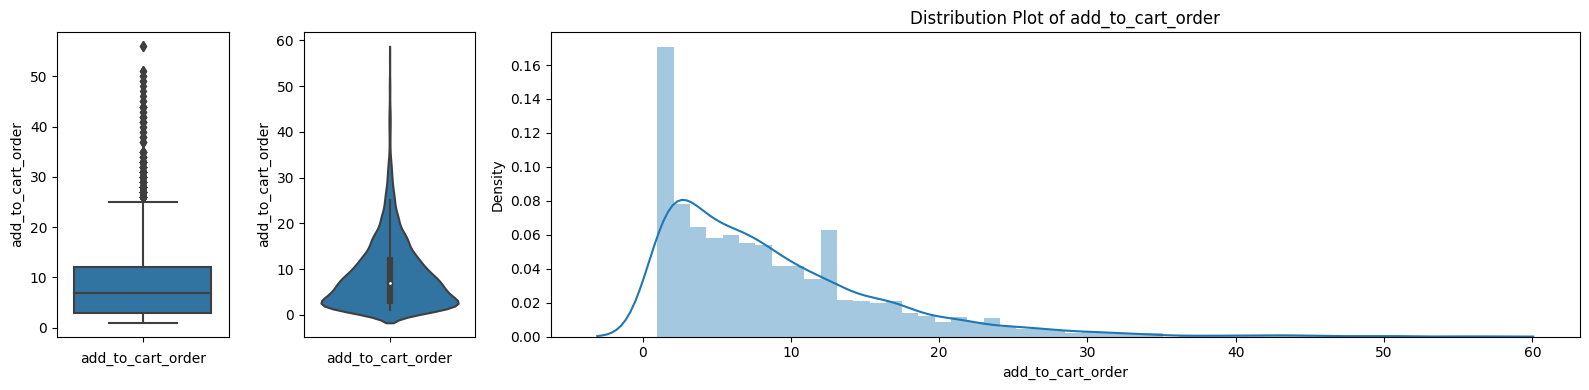

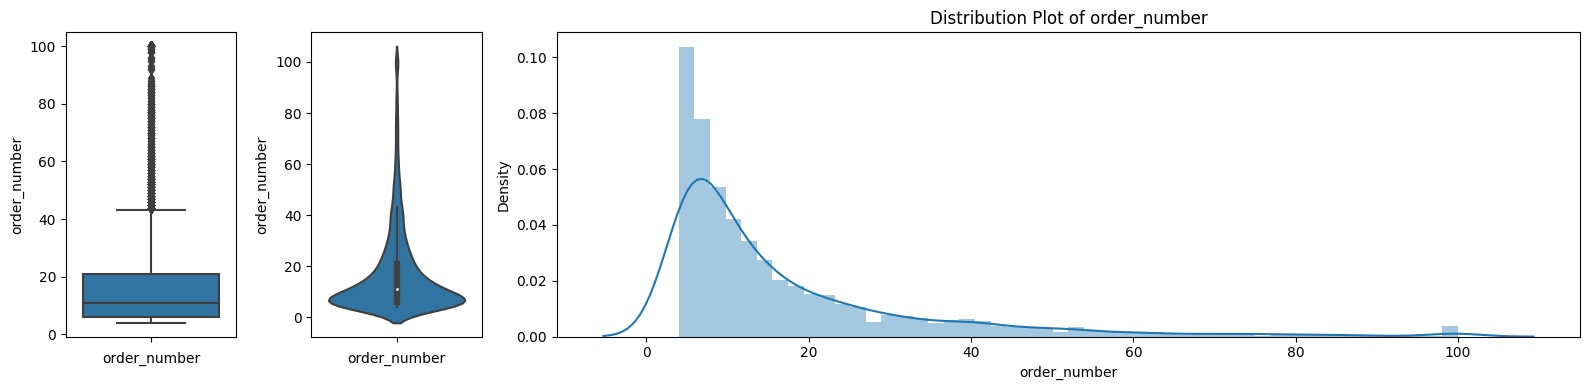

In [35]:
plot_numerical_features(train[numerical_features[2:3]+numerical_features[4:5]])

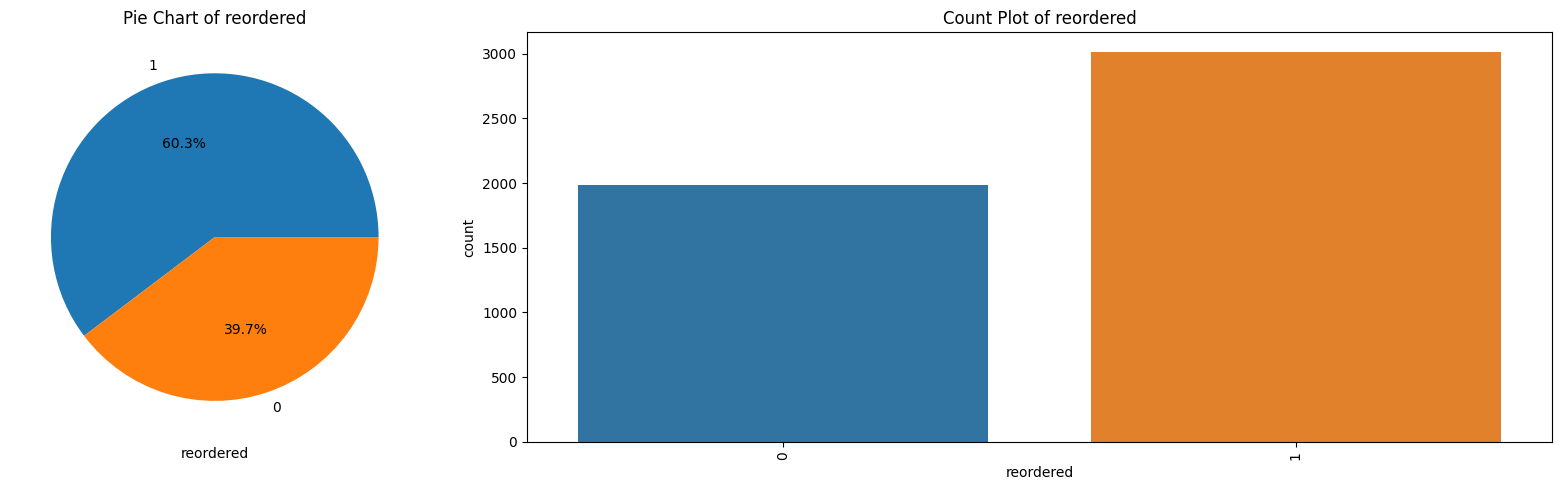

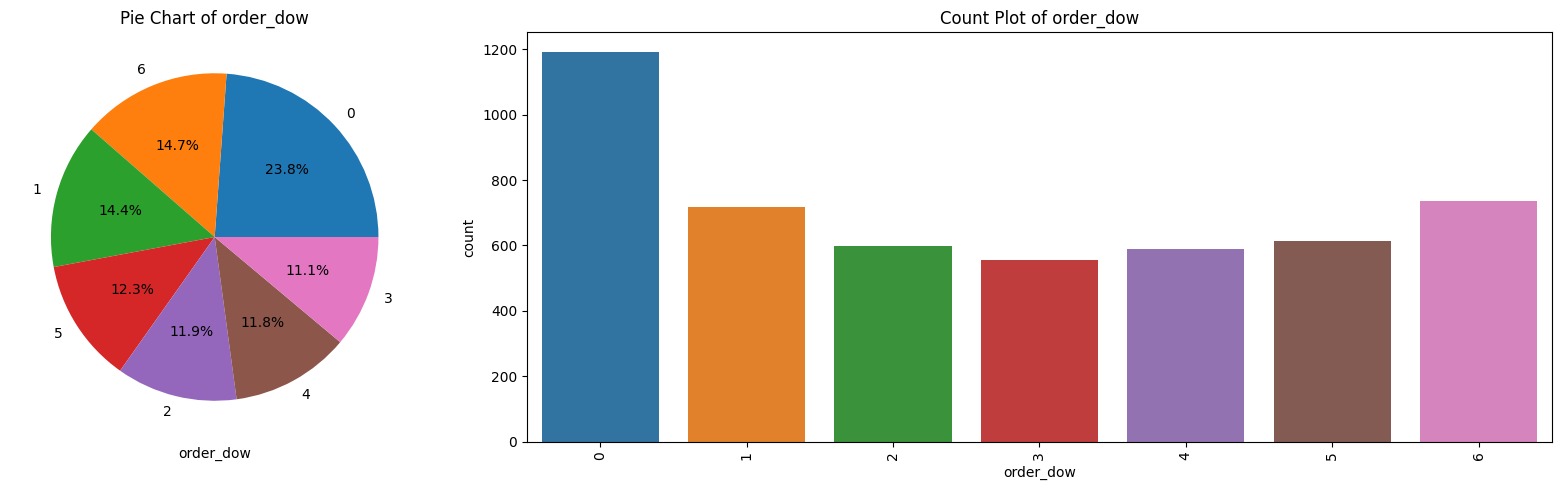

In [36]:
plot_categorical_features(train[categorical_features[:1]+categorical_features[2:3]])

# Baseline Model

In [37]:
df_dtypes(train)

,dtype,# columns,columns
0,int64,10,"['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'aisle_id', 'department_id']"
1,float64,1,['days_since_prior_order']
2,object,4,"['eval_set', 'product_name', 'aisle', 'department']"


In [38]:
train_model1 = train.copy()
test_model1  = test.copy()

In [39]:
def drop_id_feature(df, id_col='ID'):
    df_id = df[id_col]
    df = df.drop(columns=[id_col])
    return df, df_id

In [40]:
train_model1, _ = drop_id_feature(train_model1, 'product_id')
train_model1, _ = drop_id_feature(train_model1, 'user_id')
train_model1, _ = drop_id_feature(train_model1, 'aisle_id')
train_model1, _ = drop_id_feature(train_model1, 'order_id')

In [41]:
from sklearn.preprocessing import LabelEncoder

def encode_str_features(df):
    categorical_features = get_categorical_features(df.select_dtypes(exclude=[np.number]))
    label_encoder = LabelEncoder()
    for col in categorical_features:
        df[col] = label_encoder.fit_transform(df[col])

In [42]:
encode_str_features(train_model1)
encode_str_features(test_model1)
df_dtypes(train_model1)

,dtype,# columns,columns
0,int64,8,"['add_to_cart_order', 'reordered', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'department_id', 'department']"
1,float64,1,['days_since_prior_order']
2,object,2,"['product_name', 'aisle']"


In [43]:
train_model1 = train_model1.drop(columns=train_model1.select_dtypes(exclude=[np.number]).columns)
test_model1  = test_model1.drop(columns=test_model1.select_dtypes(exclude=[np.number]).columns)
df_dtypes(train_model1)

,dtype,# columns,columns
0,int64,8,"['add_to_cart_order', 'reordered', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'department_id', 'department']"
1,float64,1,['days_since_prior_order']


In [44]:
train_model1 = train_model1.drop(columns=['eval_set'])
test_model1  = test_model1.drop(columns=['eval_set'])
df_dtypes(train_model1)

,dtype,# columns,columns
0,int64,7,"['add_to_cart_order', 'reordered', 'order_number', 'order_dow', 'order_hour_of_day', 'department_id', 'department']"
1,float64,1,['days_since_prior_order']


In [45]:
def wcss_score(X, labels, cluster_centers):
    wcss = 0
    for i, center in enumerate(cluster_centers):
        cluster_points = X[labels == i]
        if cluster_points.shape[0] > 0:
            distances = np.sum((cluster_points.values - center) ** 2, axis=1)
            wcss += np.sum(distances)
    return wcss

def cohesion_separation(X, labels, cluster_centers):
    cohesion, separation = 0, 0
    for i, center in enumerate(cluster_centers):
        cluster_points = X[labels == i]
        if cluster_points.shape[0] > 0:
            cohesion += np.sum((cluster_points.values - center) ** 2)
        for j, other_center in enumerate(cluster_centers):
            if i != j:
                separation += np.sum((center - other_center) ** 2)
    return cohesion, separation

def dunn_index(X, labels, cluster_centers):
    min_intercluster_distance = np.inf
    max_intracluster_distance = 0
    for i, center in enumerate(cluster_centers):
        cluster_points = X[labels == i]
        if cluster_points.shape[0] > 0:
            intracluster_distances = np.linalg.norm(cluster_points.values - center, axis=1)
            max_intracluster_distance = max(max_intracluster_distance, np.max(intracluster_distances))
        for j, other_center in enumerate(cluster_centers):
            if i != j:
                intercluster_distance = np.linalg.norm(center - other_center)
                min_intercluster_distance = min(min_intercluster_distance, intercluster_distance)
    return min_intercluster_distance / max_intracluster_distance if max_intracluster_distance != 0 else 0

In [46]:
from sklearn.metrics         import silhouette_score, \
                                    davies_bouldin_score, \
                                    calinski_harabasz_score

def evaluate_model(X, labels, cluster_centers):
    shi  = silhouette_score(X, labels)
    dbi  = davies_bouldin_score(X, labels)
    chi  = calinski_harabasz_score(X, labels)
    wcss = wcss_score(X, labels, cluster_centers)
    coh, sep = cohesion_separation(X, labels, cluster_centers)
    dunn = dunn_index(X, labels, cluster_centers)

    result = {
        'Silhouette': shi,
        'Davies-Bouldin Index': dbi,
        'Calinski-Harabasz Index': chi,
        'WCSS': wcss,
        'Cohesion': coh,
        'Separation': sep,
        'Dunn Index': dunn,
    }
    return result

In [47]:
from sklearn.cluster         import KMeans, \
                                    AgglomerativeClustering, \
                                    Birch, \
                                    MiniBatchKMeans, \
                                    SpectralClustering, \
                                    AffinityPropagation, \
                                    MeanShift, \
                                    OPTICS, \
                                    DBSCAN

baseline_models = {
    'KMeans':                     KMeans(n_clusters=3),
    'AgglomerativeClustering':    AgglomerativeClustering(n_clusters=3),
    'Birch':                      Birch(n_clusters=3),
    'MiniBatchKMeans':            MiniBatchKMeans(n_clusters=3),
    'SpectralClustering':         SpectralClustering(n_clusters=3,
                                                     affinity='nearest_neighbors',
                                                     n_neighbors=5),
}

In [48]:
def get_cluster_centers(model, X, labels):
    if hasattr(model, 'cluster_centers_'):
        return model.cluster_centers_
    else:
        unique_labels = np.unique(labels)
        cluster_centers = np.zeros((len(unique_labels), X.shape[1]))
        for label in unique_labels:
            cluster_centers[label] = X[labels == label].mean(axis=0)
        return cluster_centers

In [49]:
import time

def run_models(models, X):
    results = {}
    for name, model in models.items():
        print(f'Model {name} begining now ...')
        begin_time = time.time()
        labels = model.fit_predict(X)
        cluster_centers = get_cluster_centers(model, X, labels)
        results[name] = evaluate_model(X, labels, cluster_centers)
        end_time = time.time()
        duration = round((end_time - begin_time) / 60, 2)
        print(f'Model {name} run in'.ljust(50), f'{duration} minutes')
    results = pd.DataFrame(results).T
    results = results.reset_index()
    results = results.rename(columns={'index': 'Model'})
    return results

In [50]:
models_result1 = run_models(baseline_models, train_model1)

Model KMeans begining now ...
Model KMeans run in                                0.03 minutes
Model AgglomerativeClustering begining now ...
Model AgglomerativeClustering run in               0.03 minutes
Model Birch begining now ...
Model Birch run in                                 0.04 minutes
Model MiniBatchKMeans begining now ...
Model MiniBatchKMeans run in                       0.01 minutes
Model SpectralClustering begining now ...
Model SpectralClustering run in                    0.07 minutes


In [51]:
models_result1

,Model,Silhouette,Davies-Bouldin Index,Calinski-Harabasz Index,WCSS,Cohesion,Separation,Dunn Index
0,KMeans,0.269776,1.309425,2704.120421,1.339189e+06,1.339189e+06,8767.618852,0.315797
1,AgglomerativeClustering,0.232867,1.394596,2397.420308,1.423082e+06,1.423082e+06,8706.310291,0.293046
2,Birch,0.239306,1.403389,2428.219570,1.414185e+06,1.414185e+06,8289.382557,0.290434
3,MiniBatchKMeans,0.269685,1.307811,2703.725140,1.339789e+06,1.339789e+06,9022.898457,0.319948
4,SpectralClustering,0.130086,1.972706,1729.980926,1.647706e+06,1.647706e+06,9595.764817,0.199483


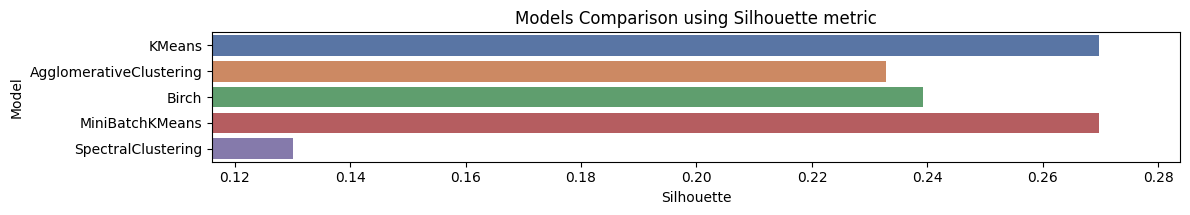

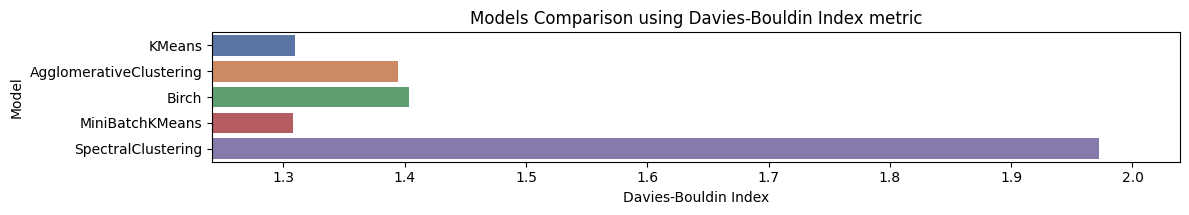

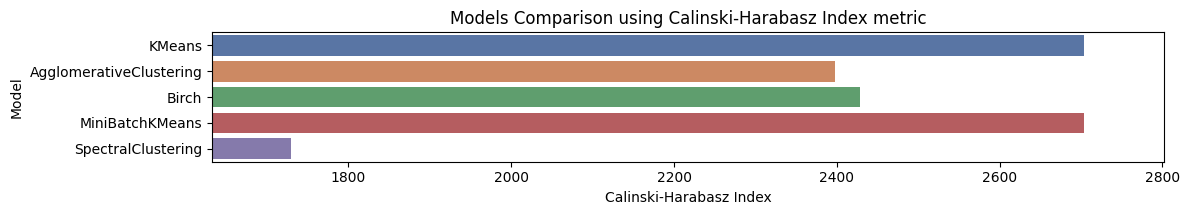

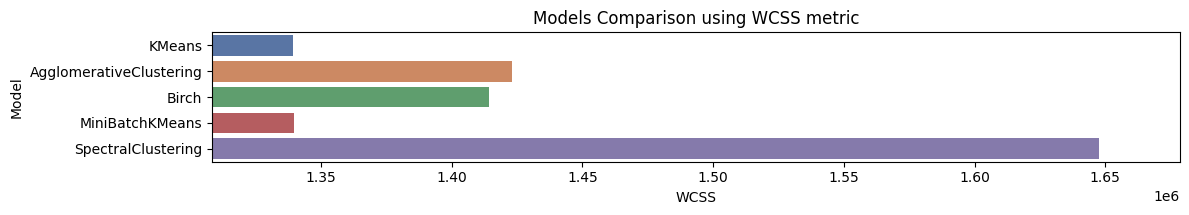

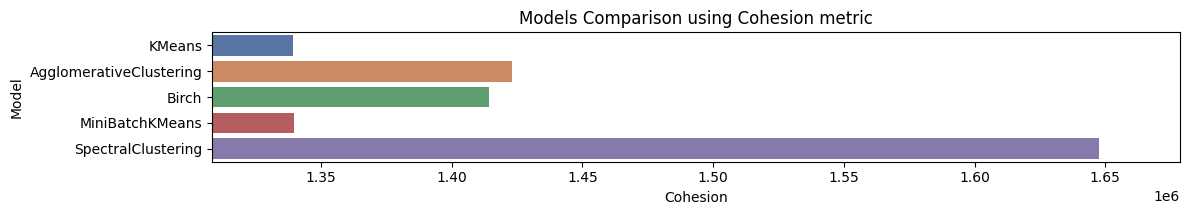

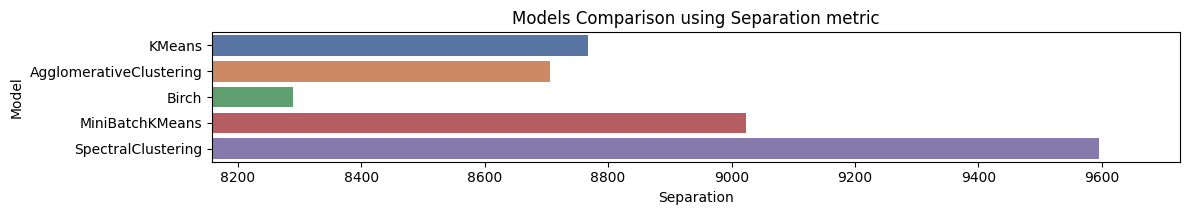

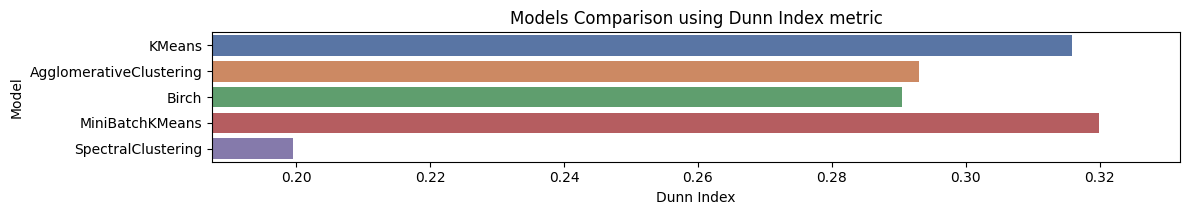

In [52]:
metrics = ['Silhouette', 'Davies-Bouldin Index', 'Calinski-Harabasz Index', 'WCSS', 'Cohesion', 'Separation', 'Dunn Index']
for metric in metrics:
    plot_bar_chart(models_result1, x=metric, y='Model', xlabel=metric, ylabel='Model', title=f"Models Comparison using {metric} metric")

In [53]:
def get_best_model(results_df, models, metric):
    best_model_name = results_df.sort_values(by=[metric]).head(1)['Model'].iloc[0]
    best_model = models[best_model_name]
    return best_model

In [54]:
best_models1 = get_best_model(models_result1, baseline_models, 'WCSS')
print('Best Model of Baseline Models is:', best_models1.__class__.__name__)

Best Model of Baseline Models is: KMeans


In [55]:
del train_model1, test_model1

# Feature Engineering and Selection

In [56]:
df_dtypes(train)

,dtype,# columns,columns
0,int64,10,"['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'aisle_id', 'department_id']"
1,float64,1,['days_since_prior_order']
2,object,4,"['eval_set', 'product_name', 'aisle', 'department']"


In [57]:
train.select_dtypes(include=[np.number]).head(10)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
979653,3121789,40706,1,1,3214,10,4,11,30.0,123,4
250737,2654597,21137,7,1,59635,23,3,18,8.0,24,4
552808,3030379,6347,1,1,106378,62,1,10,25.0,91,16
179956,464221,1000,21,0,168396,7,0,16,30.0,18,10
1352265,1445203,9421,17,1,94291,16,2,14,19.0,31,7
99207,2508649,40604,20,0,16799,4,0,15,13.0,21,16
2703,3132860,13072,3,0,173773,14,3,0,30.0,39,12
856681,3276108,35986,8,1,196373,8,5,9,14.0,54,17
983647,2664863,18362,16,1,37960,11,4,21,30.0,112,3
471503,1709288,33095,4,1,137599,11,0,17,7.0,96,20


In [58]:
train.select_dtypes(exclude=[np.number]).head(10)

,eval_set,product_name,aisle,department
979653,train,Organic Grape Tomatoes,packaged vegetables fruits,produce
250737,train,Organic Strawberries,fresh fruits,produce
552808,train,Unsweetened Almond Milk,soy lactosefree,dairy eggs
179956,train,Apricots,bulk dried fruits vegetables,bulk
1352265,train,Organic Raw Multigreen Kobmbucha,refrigerated,beverages
99207,train,Feta Cheese Crumbles,packaged cheese,dairy eggs
2703,train,Bay Scallops,seafood counter,meat seafood
856681,train,2-Ply 100% Recycled Bathroom Tissue,paper goods,household
983647,train,Organic Bread with 21 Whole Grains,bread,bakery
471503,train,"Salame, Italian Dry",lunch meat,deli


In [59]:
build_my_info_table(train)

,#,column,dtype,count,mean,std,min,25%,50%,75%,max,IQR,nunique,unique,mode,mode #,mode %,null #,null %
0,0,order_id,int64,5000,1703123.9,991649.9,1077,846101.8,1670828.0,2586643.5,3420735,3419658,4852,,668199,3,0.1,0,0.0
1,1,product_id,int64,5000,25720.3,14346.8,10,13176.0,25824.0,38407.8,49683,49673,2802,,24852,57,1.1,0,0.0
2,2,add_to_cart_order,int64,5000,8.8,7.4,1,3.0,7.0,12.0,56,55,51,,2,480,9.6,0,0.0
3,3,reordered,int64,5000,0.6,0.5,0,0.0,1.0,1.0,1,1,2,"[1, 0]",1,3015,60.3,0,0.0
4,4,user_id,int64,5000,102151.5,59568.5,1,50752.2,100702.5,153162.2,206148,206147,4852,,6499,3,0.1,0,0.0
6,6,order_number,int64,5000,17.1,17.0,4,6.0,11.0,21.0,100,96,93,,4,557,11.1,0,0.0
7,7,order_dow,int64,5000,2.7,2.2,0,1.0,2.0,5.0,6,6,7,"[4, 3, 1, 0, 2, 5, 6]",0,1192,23.8,0,0.0
8,8,order_hour_of_day,int64,5000,13.6,4.2,0,11.0,14.0,17.0,23,23,24,"[11, 18, 10, 16, 14, 15, 0, 9, 21, 17, 22, 13, 8, 20, 12, 6, 19, 7, 3, 1, 23, 5, 2, 4]",14,472,9.4,0,0.0
11,11,aisle_id,int64,5000,71.5,37.9,1,31.0,83.0,106.0,134,133,128,,83,585,11.7,0,0.0
12,12,department_id,int64,5000,10.0,6.3,1,4.0,9.0,16.0,21,20,21,"[4, 16, 10, 7, 12, 17, 3, 20, 1, 11, 15, 9, 18, 19, 13, 6, 14, 8, 21, 5, 2]",4,1476,29.5,0,0.0


In [60]:
train_model2 = train.copy()
test_model2  = test.copy()

In [61]:
train_model2, _ = drop_id_feature(train_model2, 'product_id')
train_model2, _ = drop_id_feature(train_model2, 'user_id')
train_model2, _ = drop_id_feature(train_model2, 'aisle_id')
train_model2, _ = drop_id_feature(train_model2, 'order_id')

In [62]:
test_model2, _ = drop_id_feature(test_model2, 'product_id')
test_model2, _ = drop_id_feature(test_model2, 'user_id')
test_model2, _ = drop_id_feature(test_model2, 'aisle_id')
test_model2, _ = drop_id_feature(test_model2, 'order_id')

In [63]:
encode_str_features(train_model2)
encode_str_features(test_model2)
df_dtypes(train_model2)

,dtype,# columns,columns
0,int64,8,"['add_to_cart_order', 'reordered', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'department_id', 'department']"
1,float64,1,['days_since_prior_order']
2,object,2,"['product_name', 'aisle']"


In [64]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(df):
    categorical_features = get_categorical_features(df.select_dtypes(include=[np.number]))
    encoder = OneHotEncoder(sparse=False, drop='first')
    encoded_features = encoder.fit_transform(df[categorical_features])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features), index=df.index)
    df = df.drop(columns=categorical_features)
    df = pd.concat([df, encoded_df], axis=1)
    return df

In [65]:
train_test_model2 = pd.concat([train_model2, test_model2])
train_test_model2 = one_hot_encoding(train_test_model2)
train_model2 = train_test_model2[:len(train_model2)]
test_model2  = train_test_model2[-len(test_model2):]
df_dtypes(train_model2)

,dtype,# columns,columns
0,int64,2,"['add_to_cart_order', 'order_number']"
1,float64,100,"['reordered_1', 'order_dow_1', 'order_dow_2', 'order_dow_3', 'order_dow_4', 'order_dow_5', 'order_dow_6', 'order_hour_of_day_1', 'order_hour_of_day_2', 'order_hour_of_day_3', 'order_hour_of_day_4', 'order_hour_of_day_5', 'order_hour_of_day_6', 'order_hour_of_day_7', 'order_hour_of_day_8', 'order_hour_of_day_9', 'order_hour_of_day_10', 'order_hour_of_day_11', 'order_hour_of_day_12', 'order_hour_of_day_13', 'order_hour_of_day_14', 'order_hour_of_day_15', 'order_hour_of_day_16', 'order_hour_of_day_17', 'order_hour_of_day_18', 'order_hour_of_day_19', 'order_hour_of_day_20', 'order_hour_of_day_21', 'order_hour_of_day_22', 'order_hour_of_day_23', 'days_since_prior_order_1.0', 'days_since_prior_order_2.0', 'days_since_prior_order_3.0', 'days_since_prior_order_4.0', 'days_since_prior_order_5.0', 'days_since_prior_order_6.0', 'days_since_prior_order_7.0', 'days_since_prior_order_8.0', 'days_since_prior_order_9.0', 'days_since_prior_order_10.0', 'days_since_prior_order_11.0', 'days_since_prior_order_12.0', 'days_since_prior_order_13.0', 'days_since_prior_order_14.0', 'days_since_prior_order_15.0', 'days_since_prior_order_16.0', 'days_since_prior_order_17.0', 'days_since_prior_order_18.0', 'days_since_prior_order_19.0', 'days_since_prior_order_20.0', 'days_since_prior_order_21.0', 'days_since_prior_order_22.0', 'days_since_prior_order_23.0', 'days_since_prior_order_24.0', 'days_since_prior_order_25.0', 'days_since_prior_order_26.0', 'days_since_prior_order_27.0', 'days_since_prior_order_28.0', 'days_since_prior_order_29.0', 'days_since_prior_order_30.0', 'department_id_2', 'department_id_3', 'department_id_4', 'department_id_5', 'department_id_6', 'department_id_7', 'department_id_8', 'department_id_9', 'department_id_10', 'department_id_11', 'department_id_12', 'department_id_13', 'department_id_14', 'department_id_15', 'department_id_16', 'department_id_17', 'department_id_18', 'department_id_19', 'department_id_20', 'department_id_21', 'department_1', 'department_2', 'department_3', 'department_4', 'department_5', 'department_6', 'department_7', 'department_8', 'department_9', 'department_10', 'department_11', 'department_12', 'department_13', 'department_14', 'department_15', 'department_16', 'department_17', 'department_18', 'department_19', 'department_20']"
2,object,2,"['product_name', 'aisle']"


In [66]:
train_model2 = train_model2.drop(columns=train_model2.select_dtypes(exclude=[np.number]).columns)
test_model2  = test_model2.drop(columns=test_model2.select_dtypes(exclude=[np.number]).columns)
df_dtypes(train_model2)

,dtype,# columns,columns
0,int64,2,"['add_to_cart_order', 'order_number']"
1,float64,100,"['reordered_1', 'order_dow_1', 'order_dow_2', 'order_dow_3', 'order_dow_4', 'order_dow_5', 'order_dow_6', 'order_hour_of_day_1', 'order_hour_of_day_2', 'order_hour_of_day_3', 'order_hour_of_day_4', 'order_hour_of_day_5', 'order_hour_of_day_6', 'order_hour_of_day_7', 'order_hour_of_day_8', 'order_hour_of_day_9', 'order_hour_of_day_10', 'order_hour_of_day_11', 'order_hour_of_day_12', 'order_hour_of_day_13', 'order_hour_of_day_14', 'order_hour_of_day_15', 'order_hour_of_day_16', 'order_hour_of_day_17', 'order_hour_of_day_18', 'order_hour_of_day_19', 'order_hour_of_day_20', 'order_hour_of_day_21', 'order_hour_of_day_22', 'order_hour_of_day_23', 'days_since_prior_order_1.0', 'days_since_prior_order_2.0', 'days_since_prior_order_3.0', 'days_since_prior_order_4.0', 'days_since_prior_order_5.0', 'days_since_prior_order_6.0', 'days_since_prior_order_7.0', 'days_since_prior_order_8.0', 'days_since_prior_order_9.0', 'days_since_prior_order_10.0', 'days_since_prior_order_11.0', 'days_since_prior_order_12.0', 'days_since_prior_order_13.0', 'days_since_prior_order_14.0', 'days_since_prior_order_15.0', 'days_since_prior_order_16.0', 'days_since_prior_order_17.0', 'days_since_prior_order_18.0', 'days_since_prior_order_19.0', 'days_since_prior_order_20.0', 'days_since_prior_order_21.0', 'days_since_prior_order_22.0', 'days_since_prior_order_23.0', 'days_since_prior_order_24.0', 'days_since_prior_order_25.0', 'days_since_prior_order_26.0', 'days_since_prior_order_27.0', 'days_since_prior_order_28.0', 'days_since_prior_order_29.0', 'days_since_prior_order_30.0', 'department_id_2', 'department_id_3', 'department_id_4', 'department_id_5', 'department_id_6', 'department_id_7', 'department_id_8', 'department_id_9', 'department_id_10', 'department_id_11', 'department_id_12', 'department_id_13', 'department_id_14', 'department_id_15', 'department_id_16', 'department_id_17', 'department_id_18', 'department_id_19', 'department_id_20', 'department_id_21', 'department_1', 'department_2', 'department_3', 'department_4', 'department_5', 'department_6', 'department_7', 'department_8', 'department_9', 'department_10', 'department_11', 'department_12', 'department_13', 'department_14', 'department_15', 'department_16', 'department_17', 'department_18', 'department_19', 'department_20']"


In [67]:
def get_skewed_features(df, threshold=0.25):
    numerical_features = get_numerical_features(df)
    skew_df = df[numerical_features].apply(lambda x: x.skew())
    skew_df = skew_df.sort_values(ascending=False)
    skew_df = skew_df.reset_index()
    skew_df.columns = ['Feature', 'SkewFactor']
    skewed_features = list(skew_df[abs(skew_df['SkewFactor']) > threshold]['Feature'])
    non_skewed_features = list(set(numerical_features)-set(skewed_features))
    return skewed_features, non_skewed_features, skew_df

In [68]:
from sklearn.preprocessing import StandardScaler

def transform_skewed_features(df, skewed_features):
    for col in skewed_features:
        df[col] = np.log1p(df[col])

standardScaler = StandardScaler()

def transform_non_skewed_features(df, non_skewed_features):
    for col in non_skewed_features:
        df[col] = standardScaler.fit_transform(df[[col]])

In [69]:
skewed_features, non_skewed_features, skew_df = get_skewed_features(train_model2)
print(f'skewed_features:     {len(skewed_features)}\n{skewed_features}\n')
print(f'non_skewed_features: {len(non_skewed_features)}\n{non_skewed_features}\n')

skewed_features:     2
['order_number', 'add_to_cart_order']

non_skewed_features: 0
[]



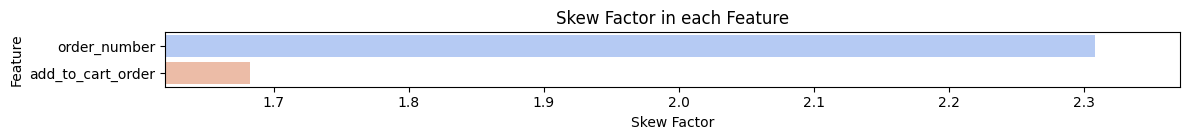

In [70]:
plot_bar_chart(skew_df, x='SkewFactor', y='Feature', xlabel='Skew Factor', ylabel='Feature', title='Skew Factor in each Feature', palette='coolwarm')

In [71]:
transform_skewed_features(train_model2, skewed_features)
transform_non_skewed_features(train_model2, non_skewed_features)

In [72]:
skewed_features, non_skewed_features, skew_df = get_skewed_features(test_model2)
print(f'skewed_features:     {len(skewed_features)}\n{skewed_features}\n')
print(f'non_skewed_features: {len(non_skewed_features)}\n{non_skewed_features}\n')

skewed_features:     2
['add_to_cart_order', 'order_number']

non_skewed_features: 0
[]



In [73]:
transform_skewed_features(test_model2, skewed_features)
transform_non_skewed_features(test_model2, non_skewed_features)

# Enhanced Features Model

In [74]:
df_dtypes(train_model2)

,dtype,# columns,columns
0,float64,102,"['add_to_cart_order', 'order_number', 'reordered_1', 'order_dow_1', 'order_dow_2', 'order_dow_3', 'order_dow_4', 'order_dow_5', 'order_dow_6', 'order_hour_of_day_1', 'order_hour_of_day_2', 'order_hour_of_day_3', 'order_hour_of_day_4', 'order_hour_of_day_5', 'order_hour_of_day_6', 'order_hour_of_day_7', 'order_hour_of_day_8', 'order_hour_of_day_9', 'order_hour_of_day_10', 'order_hour_of_day_11', 'order_hour_of_day_12', 'order_hour_of_day_13', 'order_hour_of_day_14', 'order_hour_of_day_15', 'order_hour_of_day_16', 'order_hour_of_day_17', 'order_hour_of_day_18', 'order_hour_of_day_19', 'order_hour_of_day_20', 'order_hour_of_day_21', 'order_hour_of_day_22', 'order_hour_of_day_23', 'days_since_prior_order_1.0', 'days_since_prior_order_2.0', 'days_since_prior_order_3.0', 'days_since_prior_order_4.0', 'days_since_prior_order_5.0', 'days_since_prior_order_6.0', 'days_since_prior_order_7.0', 'days_since_prior_order_8.0', 'days_since_prior_order_9.0', 'days_since_prior_order_10.0', 'days_since_prior_order_11.0', 'days_since_prior_order_12.0', 'days_since_prior_order_13.0', 'days_since_prior_order_14.0', 'days_since_prior_order_15.0', 'days_since_prior_order_16.0', 'days_since_prior_order_17.0', 'days_since_prior_order_18.0', 'days_since_prior_order_19.0', 'days_since_prior_order_20.0', 'days_since_prior_order_21.0', 'days_since_prior_order_22.0', 'days_since_prior_order_23.0', 'days_since_prior_order_24.0', 'days_since_prior_order_25.0', 'days_since_prior_order_26.0', 'days_since_prior_order_27.0', 'days_since_prior_order_28.0', 'days_since_prior_order_29.0', 'days_since_prior_order_30.0', 'department_id_2', 'department_id_3', 'department_id_4', 'department_id_5', 'department_id_6', 'department_id_7', 'department_id_8', 'department_id_9', 'department_id_10', 'department_id_11', 'department_id_12', 'department_id_13', 'department_id_14', 'department_id_15', 'department_id_16', 'department_id_17', 'department_id_18', 'department_id_19', 'department_id_20', 'department_id_21', 'department_1', 'department_2', 'department_3', 'department_4', 'department_5', 'department_6', 'department_7', 'department_8', 'department_9', 'department_10', 'department_11', 'department_12', 'department_13', 'department_14', 'department_15', 'department_16', 'department_17', 'department_18', 'department_19', 'department_20']"


In [75]:
replace_inf(train_model2)
replace_inf(test_model2)
fillna(train_model2)
fillna(test_model2)

In [76]:
from sklearn.feature_selection import mutual_info_regression

def feature_selection(df, mutual_info_method, top_n=10):
    X = df.select_dtypes(include=[np.number])
    importance_df = []
    for feature in X.columns:
        mi_scores = []
        for other_feature in X.columns:
            if feature != other_feature:
                mi = mutual_info_method(X[[feature]], X[other_feature])
                mi_scores.append(mi[0])
        importance_df.append((feature, np.mean(mi_scores)))

    importance_df = pd.DataFrame(importance_df, columns=['Feature', 'ImportanceFactor'])
    importance_df = importance_df.sort_values(by='ImportanceFactor', ascending=False)
    importance_df = importance_df.head(top_n)
    return importance_df

In [77]:
importance_df = feature_selection(train_model2, mutual_info_regression)

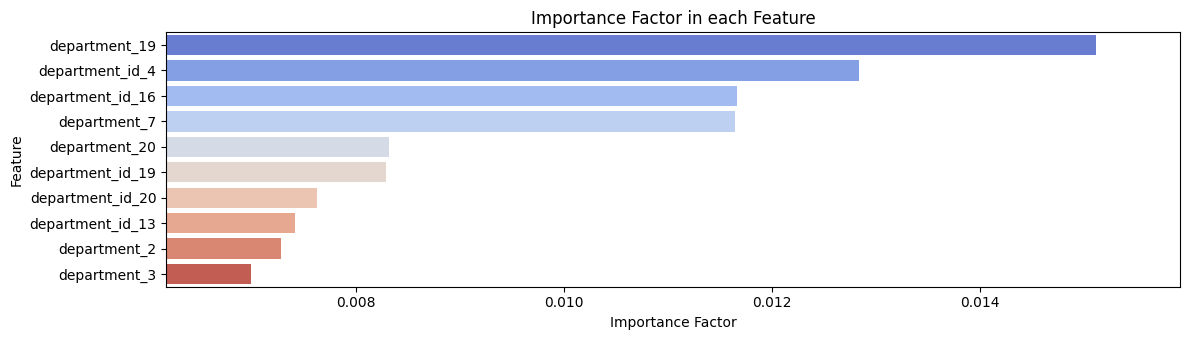

In [78]:
plot_bar_chart(importance_df, x='ImportanceFactor', y='Feature', xlabel='Importance Factor', ylabel='Feature', title='Importance Factor in each Feature', palette='coolwarm')

In [79]:
selected_features = importance_df['Feature']
train_model2 = train_model2[selected_features]
test_model2  = test_model2[selected_features]
df_dtypes(train_model2)

,dtype,# columns,columns
0,float64,10,"['department_19', 'department_id_4', 'department_id_16', 'department_7', 'department_20', 'department_id_19', 'department_id_20', 'department_id_13', 'department_2', 'department_3']"


In [80]:
from matplotlib.colors import LinearSegmentedColormap

def plot_heatmap(df, size_factor=1/2):
    df = df.select_dtypes(include=[np.number])
    height = int(len(df.columns) * size_factor)
    font_size = max(min(12, 119 // height), 8)
    cmap = LinearSegmentedColormap.from_list(
        'custom_diverging',
        ['blue', 'lightblue', 'white', 'lightcoral', 'red'],
        N=5
    )
    cbar_kws = {'ticks': [-1, -.5, 0, .5, 1]}
    my_heatmap(df, size=(height+1, height+1), cmap=cmap, cbar_kws=cbar_kws, font_size=font_size)

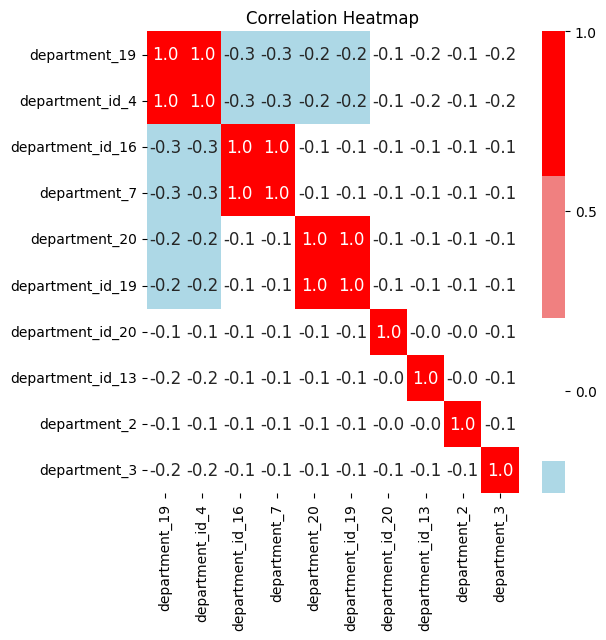

In [81]:
plot_heatmap(train_model2)

In [82]:
models_result2 = run_models(baseline_models, train_model2)

Model KMeans begining now ...
Model KMeans run in                                0.03 minutes
Model AgglomerativeClustering begining now ...
Model AgglomerativeClustering run in               0.02 minutes
Model Birch begining now ...
Model Birch run in                                 0.01 minutes
Model MiniBatchKMeans begining now ...
Model MiniBatchKMeans run in                       0.01 minutes
Model SpectralClustering begining now ...
Model SpectralClustering run in                    0.06 minutes


In [83]:
models_result2

,Model,Silhouette,Davies-Bouldin Index,Calinski-Harabasz Index,WCSS,Cohesion,Separation,Dunn Index
0,KMeans,0.704454,0.473887,5435.903039,1637.431264,1637.431264,16.365955,1.201635
1,AgglomerativeClustering,0.704454,0.473887,5435.903039,1637.431264,1637.431264,16.365955,1.201635
2,Birch,0.704454,0.473887,5435.903039,1637.431264,1637.431264,16.365955,1.201635
3,MiniBatchKMeans,0.704454,0.473887,5435.903039,1637.493674,1637.493674,16.366844,1.199941
4,SpectralClustering,0.397136,0.701532,1487.577928,3259.354140,3259.354140,13.313021,0.840669


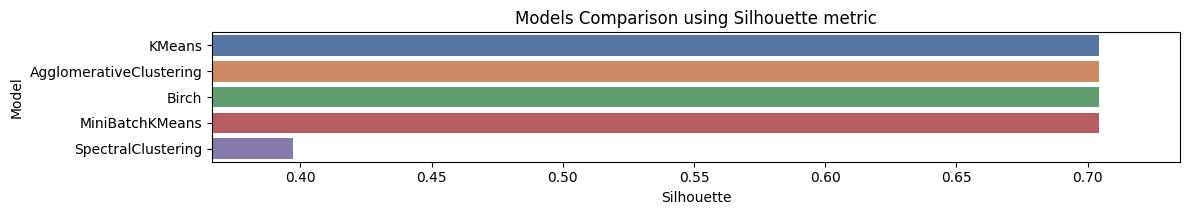

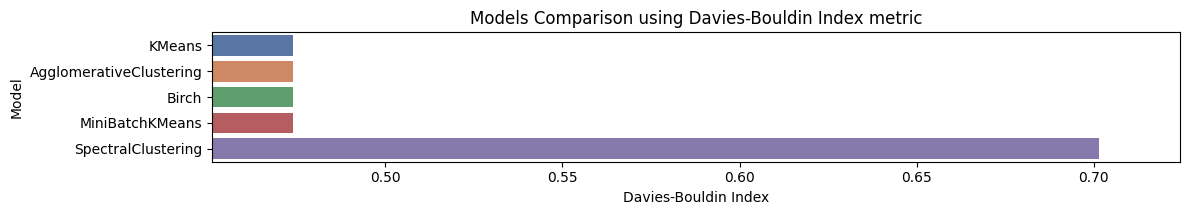

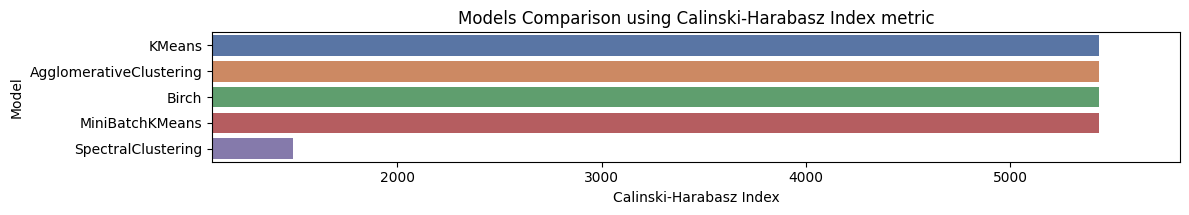

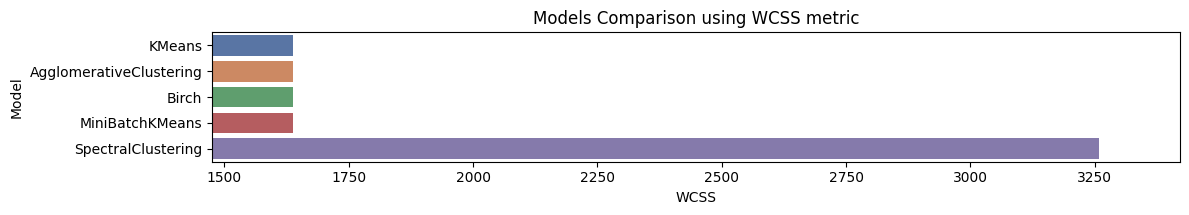

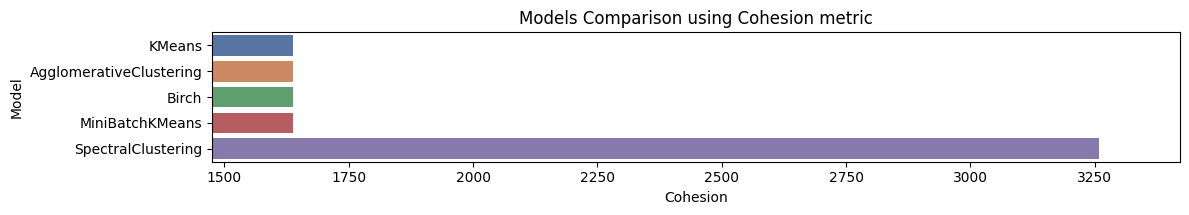

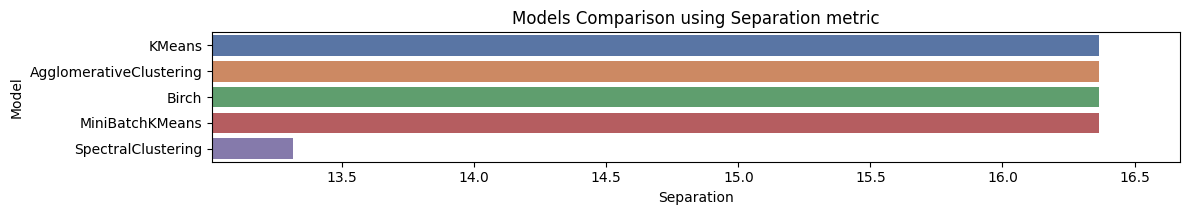

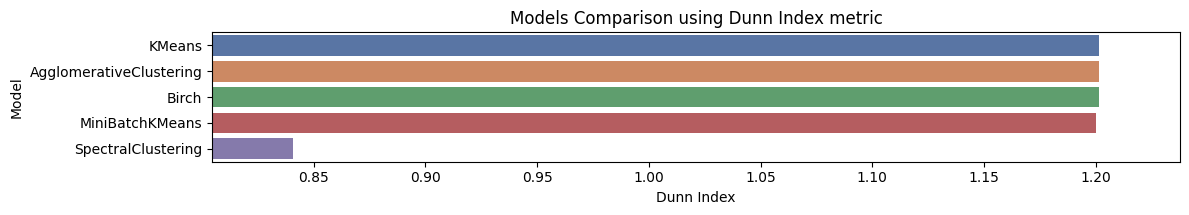

In [84]:
for metric in metrics:
    plot_bar_chart(models_result2, x=metric, y='Model', xlabel=metric, ylabel='Model', title=f"Models Comparison using {metric} metric")

In [85]:
best_models2 = get_best_model(models_result2, baseline_models, 'WCSS')
print('Best Model of Enhanced Features Models is:', best_models2.__class__.__name__)

Best Model of Enhanced Features Models is: KMeans


In [86]:
del train_model2, test_model2

# Outlier Detection and Treatment

In [87]:
df_dtypes(train)

,dtype,# columns,columns
0,int64,10,"['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'aisle_id', 'department_id']"
1,float64,1,['days_since_prior_order']
2,object,4,"['eval_set', 'product_name', 'aisle', 'department']"


In [88]:
train_model3 = train.copy()
test_model3  = test.copy()

In [89]:
train_model3, _ = drop_id_feature(train_model3, 'product_id')
train_model3, _ = drop_id_feature(train_model3, 'user_id')
train_model3, _ = drop_id_feature(train_model3, 'aisle_id')
train_model3, _ = drop_id_feature(train_model3, 'order_id')

In [90]:
encode_str_features(train_model3)
encode_str_features(test_model3)
df_dtypes(train_model3)

,dtype,# columns,columns
0,int64,8,"['add_to_cart_order', 'reordered', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'department_id', 'department']"
1,float64,1,['days_since_prior_order']
2,object,2,"['product_name', 'aisle']"


In [91]:
train_model3 = train_model3.drop(columns=train_model3.select_dtypes(exclude=[np.number]).columns)
test_model3  = test_model3.drop(columns=test_model3.select_dtypes(exclude=[np.number]).columns)
df_dtypes(train_model3)

,dtype,# columns,columns
0,int64,8,"['add_to_cart_order', 'reordered', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'department_id', 'department']"
1,float64,1,['days_since_prior_order']


In [92]:
def plot_feature_with_outlier(df, plot_func, outliers_indices, outliers_methods, x_col, y_col):
    for i in range(len(outliers_methods)):
        fig, ax = plt.subplots(1, 2, figsize=(12*2, 4))
        ax[0].set_title('Original Data')
        ax[1].set_title(f'Data without Outliers of {y_col} using {outliers_methods[i].__name__}')
        plot_func(x=x_col, y=y_col, ax=ax[0], data=df)
        plot_func(x=x_col, y=y_col, ax=ax[1], data=df.drop(outliers_indices[i]))
        plt.tight_layout()
        plt.show()

In [93]:
def outliers_iqr(df, col):
    outliers = pd.DataFrame()
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers = df.index[outliers]
    return outliers

def outliers_zscore(df, col, threshold=3):
    outliers = pd.DataFrame()
    z_scores = np.abs((df[col] - np.mean(df[col])) / np.std(df[col]))
    outliers = z_scores > threshold
    outliers = df.index[outliers]
    return outliers

In [94]:
def detect_outliers(df, target_feature, outliers_method):
    outliers_indices = [item for item in outliers_method(df, target_feature)]
    return outliers_indices

In [95]:
def plot_feature_with_outlier_methods(df, target_feature, outliers_methods, plot_func):
    outliers = [0] * len(outliers_methods)
    for i in range(len(outliers_methods)):
        outliers[i] = detect_outliers(df, target_feature, outliers_methods[i])
        print(f'length of {target_feature} outliers_indices: {len(outliers[i])} using {outliers_methods[i].__name__}')
    if sum(len(curr_outliers) for curr_outliers in outliers) == 0:
        return
    for curr_col in df.columns:
        if curr_col == target_feature:
            continue
        plot_feature_with_outlier(df, plot_func, outliers, outliers_methods, x_col=curr_col, y_col=target_feature)

In [96]:
def outlier_summary(df, method1, method2):
    numerical_features = get_numerical_features(df)
    df = df[numerical_features]
    outlier_info = pd.DataFrame({
        '#':        np.arange(len(df.columns)),
        'column':   df.columns,
        'dtype':    compute_dtype(df),
        'count':    compute_count(df),
        'mean':     compute_mean(df, numerical_features),
        'std':      compute_std(df, numerical_features),
        'min':      compute_min(df, numerical_features),
        '25%':      compute_quantile(df, numerical_features, .25),
        '50%':      compute_quantile(df, numerical_features, .5),
        '75%':      compute_quantile(df, numerical_features, .75),
        'max':      compute_max(df, numerical_features),
        'IQR':      compute_IQR(df, numerical_features),

        f'{method1.__name__}':  [list(method1(df, col)) for col in numerical_features],
        f'{method2.__name__}':  [list(method2(df, col)) for col in numerical_features],
    })

    outlier_info[f'{method1.__name__} length']  = outlier_info[f'{method1.__name__}'].apply(len)
    outlier_info[f'{method2.__name__} length']  = outlier_info[f'{method2.__name__}'].apply(len)

    if outlier_info[f'{method1.__name__} length'].shape[0] == 0 or \
       outlier_info[f'{method2.__name__} length'].shape[0] == 0:
        outlier_info['all_indices'] = pd.Series([set() for _ in range(len(outlier_info))], 
                                                index=outlier_info.index, dtype='object')
    else:
        outlier_info['all_indices'] = outlier_info.apply(lambda x:set(x[f'{method1.__name__}']) & \
                                                                  set(x[f'{method2.__name__}']), axis=1)
    outlier_info['all_indices length'] = outlier_info['all_indices'].apply(len)
    
    outlier_info = outlier_info.sort_values(by='all_indices length', ascending=False)
    outlier_info = outlier_info[outlier_info['all_indices length'] > 0]
    return outlier_info

In [97]:
outlier_info = outlier_summary(train_model3, outliers_iqr, outliers_zscore)
outlier_info.drop(columns=['outliers_iqr', 'outliers_zscore', 'all_indices'])

,#,column,dtype,count,mean,std,min,25%,50%,75%,max,IQR,outliers_iqr length,outliers_zscore length,all_indices length
1,1,order_number,int64,5000,17.1,17.0,4,6.0,11.0,21.0,100,96,386,127,127
0,0,add_to_cart_order,int64,5000,8.8,7.4,1,3.0,7.0,12.0,56,55,181,71,71


In [98]:
def get_outlier_indices(outlier_info, method1, method2):
    col = 'all_indices'
    all_indices = set()
    for curr_indices in outlier_info[col]:
        all_indices |= curr_indices
    outlier_percentage = round(len(all_indices) / outlier_info['count'].max() * 100, 1)
    print(f'Total indices among all numerical features are: {len(all_indices)} ({outlier_percentage} %) of the dataset')
    return list(all_indices)

In [99]:
outlier_indices = get_outlier_indices(outlier_info, outliers_iqr, outliers_zscore)

Total indices among all numerical features are: 195 (3.9 %) of the dataset


In [100]:
feature = 'days_since_prior_order'
plot_feature_with_outlier_methods(train_model3[[categorical_features[0]]+[feature]], feature, [outliers_iqr, outliers_zscore], sns.boxplot)

length of days_since_prior_order outliers_indices: 0 using outliers_iqr
length of days_since_prior_order outliers_indices: 0 using outliers_zscore


In [101]:
print('Dataset shape before drop the outliers', train_model3.shape)
train_model3 = train_model3.drop(index=outlier_indices)
print('Dataset shape after drop the outliers ', train_model3.shape)

Dataset shape before drop the outliers (5000, 9)
Dataset shape after drop the outliers  (4805, 9)


# Outlier Treatment Model

In [102]:
df_dtypes(train_model3)

,dtype,# columns,columns
0,int64,8,"['add_to_cart_order', 'reordered', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'department_id', 'department']"
1,float64,1,['days_since_prior_order']


In [103]:
replace_inf(train_model3)
replace_inf(test_model3)
fillna(train_model3)
fillna(test_model3)

In [104]:
models_result3 = run_models(baseline_models, train_model3)

Model KMeans begining now ...
Model KMeans run in                                0.03 minutes
Model AgglomerativeClustering begining now ...
Model AgglomerativeClustering run in               0.02 minutes
Model Birch begining now ...
Model Birch run in                                 0.03 minutes
Model MiniBatchKMeans begining now ...
Model MiniBatchKMeans run in                       0.01 minutes
Model SpectralClustering begining now ...
Model SpectralClustering run in                    0.07 minutes


In [105]:
models_result3

,Model,Silhouette,Davies-Bouldin Index,Calinski-Harabasz Index,WCSS,Cohesion,Separation,Dunn Index
0,KMeans,0.278057,1.317620,2336.999756,1.030913e+06,1.030913e+06,4892.768401,0.565186
1,AgglomerativeClustering,0.221712,1.401373,1824.029463,1.156079e+06,1.156079e+06,6379.601865,0.351865
2,Birch,0.241523,1.379851,1953.579690,1.121685e+06,1.121685e+06,5782.623084,0.351746
3,MiniBatchKMeans,0.277486,1.319351,2334.476080,1.033449e+06,1.033449e+06,4636.214128,0.533013
4,SpectralClustering,0.008559,2.164135,308.214475,1.802909e+06,1.802909e+06,1712.411020,0.251112


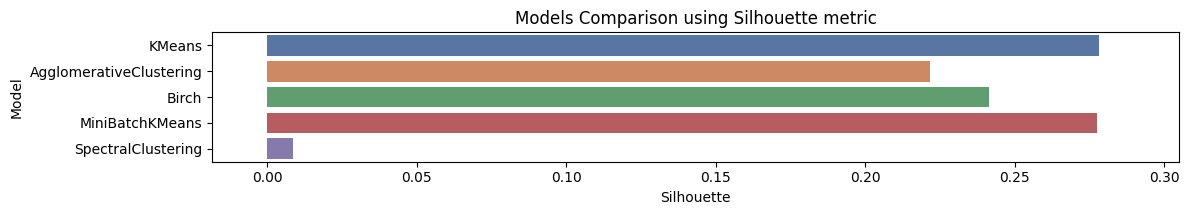

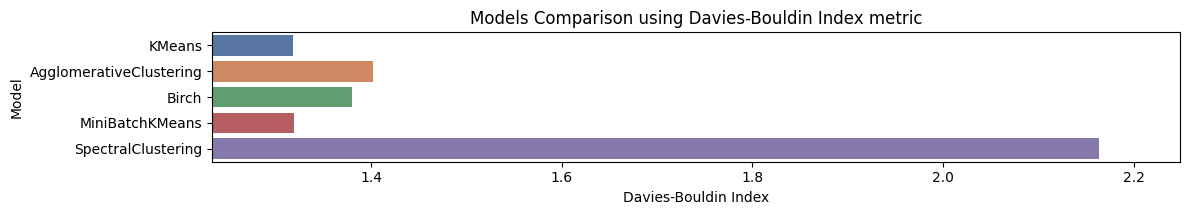

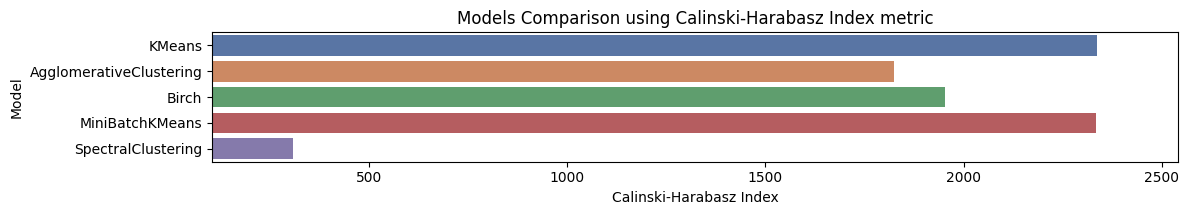

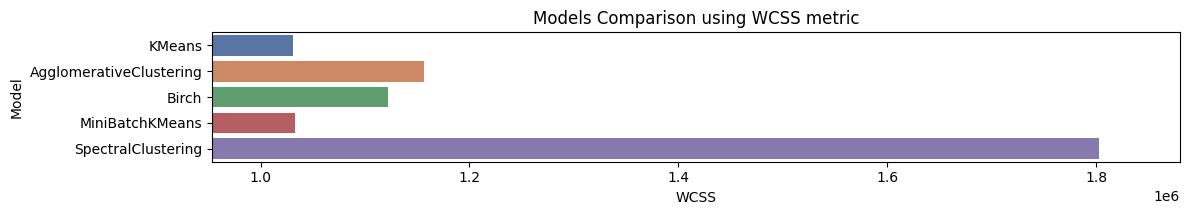

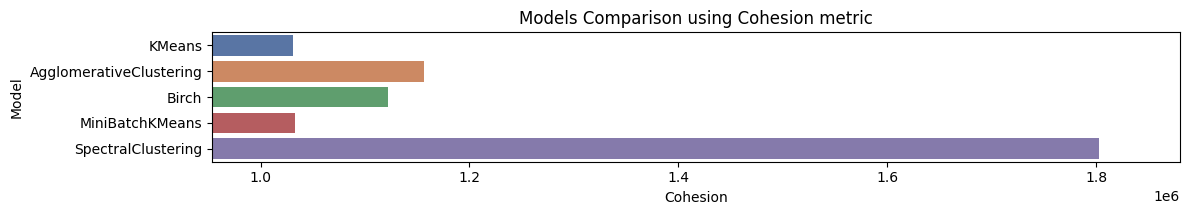

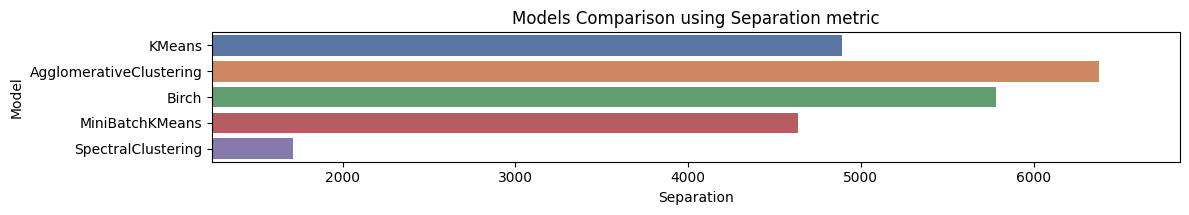

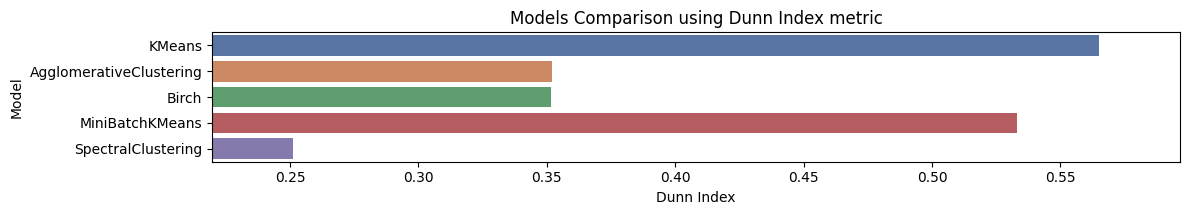

In [106]:
for metric in metrics:
    plot_bar_chart(models_result3, x=metric, y='Model', xlabel=metric, ylabel='Model', title=f"Models Comparison using {metric} metric")

In [107]:
best_models3 = get_best_model(models_result3, baseline_models, 'WCSS')
print('Best Model of Outlier Treatment Models is:', best_models3.__class__.__name__)

Best Model of Outlier Treatment Models is: KMeans


In [108]:
del train_model3, test_model3

# Imbalanced Data Treatment Enhancements

In [109]:
df_dtypes(train)

,dtype,# columns,columns
0,int64,10,"['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'aisle_id', 'department_id']"
1,float64,1,['days_since_prior_order']
2,object,4,"['eval_set', 'product_name', 'aisle', 'department']"


In [110]:
train_model6 = train.copy()
test_model6  = test.copy()

In [111]:
train_model6, _ = drop_id_feature(train_model6, 'product_id')
train_model6, _ = drop_id_feature(train_model6, 'user_id')
train_model6, _ = drop_id_feature(train_model6, 'aisle_id')
train_model6, _ = drop_id_feature(train_model6, 'order_id')

In [112]:
encode_str_features(train_model6)
encode_str_features(test_model6)
df_dtypes(train_model6)

,dtype,# columns,columns
0,int64,8,"['add_to_cart_order', 'reordered', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'department_id', 'department']"
1,float64,1,['days_since_prior_order']
2,object,2,"['product_name', 'aisle']"


In [113]:
train_model6 = train_model6.drop(columns=train_model6.select_dtypes(exclude=[np.number]).columns)
test_model6  = test_model6.drop(columns=test_model6.select_dtypes(exclude=[np.number]).columns)
df_dtypes(train_model6)

,dtype,# columns,columns
0,int64,8,"['add_to_cart_order', 'reordered', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'department_id', 'department']"
1,float64,1,['days_since_prior_order']


In [114]:
from collections import Counter
from imblearn.over_sampling import SMOTE

def oversampling_imbalanced_data(df, target_feature, k_neighbors=5):
    if k_neighbors >= min(Counter(df[target_feature]).values()):
        return df
    X = df.drop(target_feature, axis=1)
    y = df[target_feature]
    oversampler = SMOTE(k_neighbors=k_neighbors)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                              pd.DataFrame(y_resampled, columns=[target_feature])], axis=1)
    return df_resampled

In [115]:
def plot_imbalanced_feature(df, df_resampled, target_feature):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(x=df[target_feature])
    plt.title('Class Distribution Before Oversampling')
    plt.xlabel(target_feature)
    plt.subplot(1, 2, 2)
    sns.countplot(x=df_resampled[target_feature])
    plt.title('Class Distribution After Oversampling')
    plt.xlabel(target_feature)

    plt.tight_layout()
    plt.show()

In [116]:
def plot_imbalanced_features(df, features):
    for col in features:
        if df[col].nunique() == 1:
            continue
        df_resampled = oversampling_imbalanced_data(df, col)
        if df.shape != df_resampled.shape:
            print(f'col: {col}, df.shape: {df.shape}, df_resampled.shape: {df_resampled.shape}')
            plot_imbalanced_feature(df, df_resampled, col)

In [117]:
def oversampling_data(df, features):
    for col in features:
        if df[col].nunique() == 1:
            continue
        df_resampled = oversampling_imbalanced_data(df, col)
        df = df_resampled.copy()
    return df

In [118]:
oversamplying_features = get_categorical_features(train_model6.select_dtypes(exclude=['float']), 4)
build_my_info_table(train_model6[oversamplying_features])

,#,column,dtype,count,mean,std,min,25%,50%,75%,max,IQR,nunique,unique,mode,mode #,mode %,null #,null %
0,0,reordered,int64,5000,0.6,0.5,0,0.0,1.0,1.0,1,1,2,"[1, 0]",1,3015,60.3,0,0.0
1,1,eval_set,int64,5000,0.0,0.0,0,0.0,0.0,0.0,0,0,1,[0],0,5000,100.0,0,0.0


col: reordered, df.shape: (5000, 9), df_resampled.shape: (6030, 9)


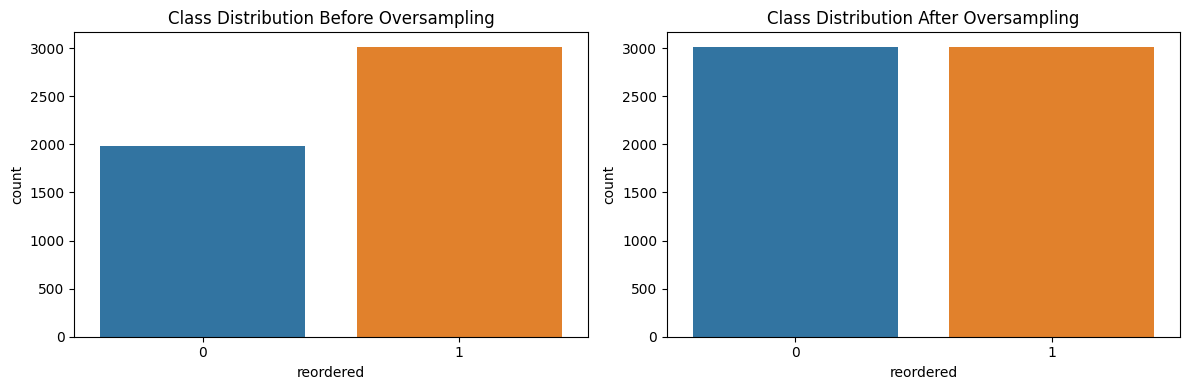

In [119]:
plot_imbalanced_features(train_model6, oversamplying_features)

In [120]:
print('Dataset shape before apply the oversampling', train_model6.shape)
train_model6 = oversampling_data(train_model6, oversamplying_features)
print('Dataset shape after apply the oversampling ', train_model6.shape)

Dataset shape before apply the oversampling (5000, 9)
Dataset shape after apply the oversampling  (6030, 9)


# Imbalanced Data Treatment Model

In [121]:
df_dtypes(train_model6)

,dtype,# columns,columns
0,int64,8,"['add_to_cart_order', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'department_id', 'department', 'reordered']"
1,float64,1,['days_since_prior_order']


In [122]:
replace_inf(train_model6)
replace_inf(test_model6)
fillna(train_model6)
fillna(test_model6)

In [123]:
models_result6 = run_models(baseline_models, train_model6)

Model KMeans begining now ...
Model KMeans run in                                0.03 minutes
Model AgglomerativeClustering begining now ...
Model AgglomerativeClustering run in               0.04 minutes
Model Birch begining now ...
Model Birch run in                                 0.05 minutes
Model MiniBatchKMeans begining now ...
Model MiniBatchKMeans run in                       0.01 minutes
Model SpectralClustering begining now ...
Model SpectralClustering run in                    0.09 minutes


In [124]:
models_result6

,Model,Silhouette,Davies-Bouldin Index,Calinski-Harabasz Index,WCSS,Cohesion,Separation,Dunn Index
0,KMeans,0.275676,1.289032,3247.243541,1.567139e+06,1.567139e+06,8978.850476,0.317263
1,AgglomerativeClustering,0.286834,1.140534,2312.970021,1.842018e+06,1.842018e+06,16494.232412,0.464928
2,Birch,0.249775,1.359375,2916.100627,1.654657e+06,1.654657e+06,8593.582397,0.299526
3,MiniBatchKMeans,0.280703,1.234390,2633.596647,1.738536e+06,1.738536e+06,12965.725215,0.436586
4,SpectralClustering,0.134360,1.942719,2126.344039,1.908901e+06,1.908901e+06,8115.093294,0.205627


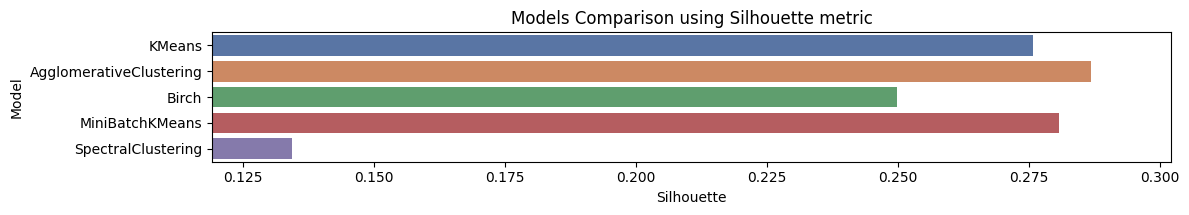

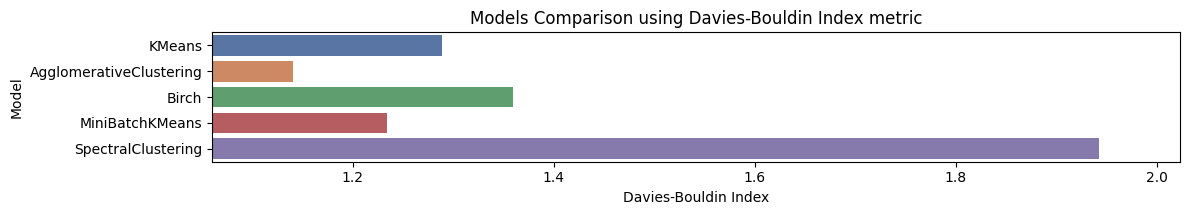

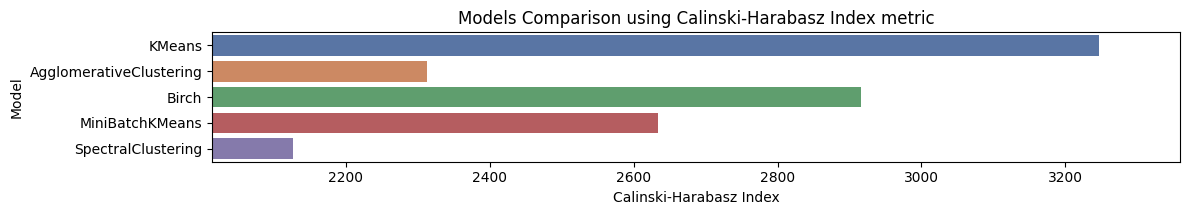

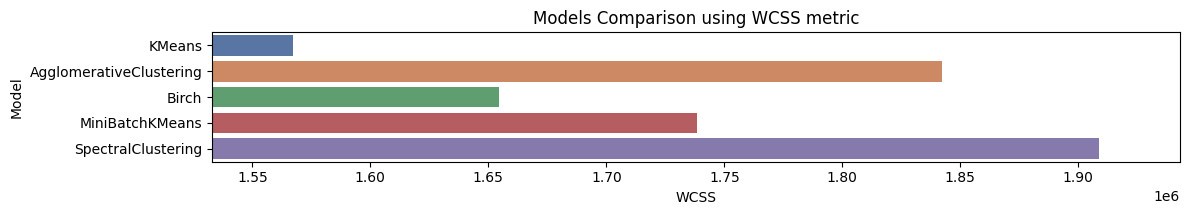

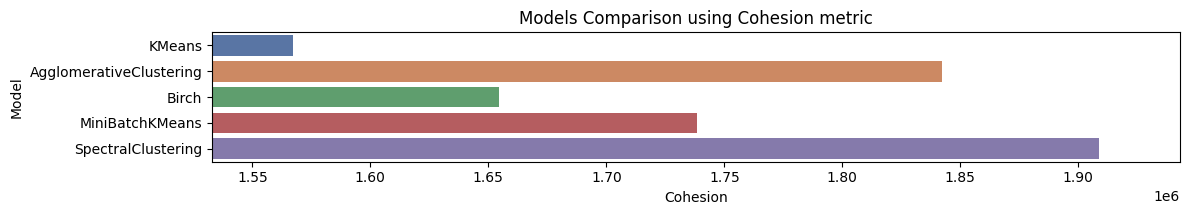

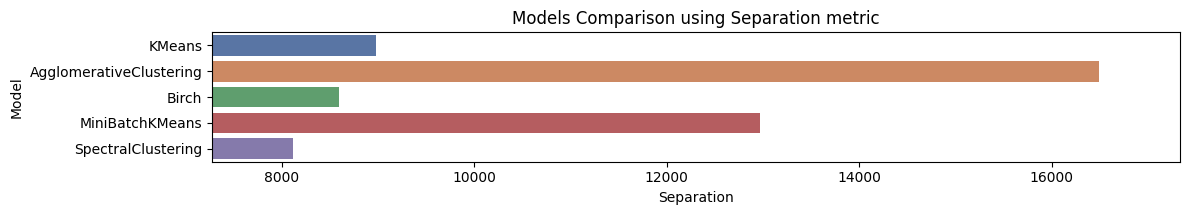

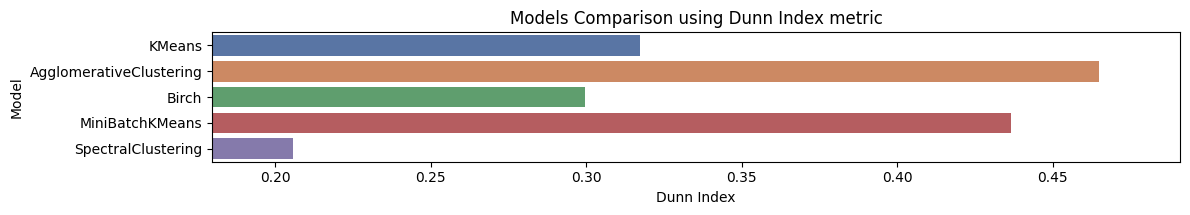

In [125]:
for metric in metrics:
    plot_bar_chart(models_result6, x=metric, y='Model', xlabel=metric, ylabel='Model', title=f"Models Comparison using {metric} metric")

In [126]:
best_models6 = get_best_model(models_result6, baseline_models, 'WCSS')
print('Best Model of Imbalanced Data Treatment Models is:', best_models6.__class__.__name__)

Best Model of Imbalanced Data Treatment Models is: KMeans


In [127]:
del train_model6, test_model6

# Combine All Enhancements

In [128]:
df_dtypes(train)

,dtype,# columns,columns
0,int64,10,"['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'aisle_id', 'department_id']"
1,float64,1,['days_since_prior_order']
2,object,4,"['eval_set', 'product_name', 'aisle', 'department']"


In [129]:
train_model4 = train.copy()
test_model4  = test.copy()

In [130]:
encode_str_features(train_model4)
encode_str_features(test_model4)
df_dtypes(train_model4)

,dtype,# columns,columns
0,int64,12,"['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'aisle_id', 'department_id', 'department']"
1,float64,1,['days_since_prior_order']
2,object,2,"['product_name', 'aisle']"


In [131]:
outlier_info = outlier_summary(train_model4, outliers_iqr, outliers_zscore)
outlier_indices = get_outlier_indices(outlier_info, outliers_iqr, outliers_zscore)

Total indices among all numerical features are: 195 (3.9 %) of the dataset


In [132]:
print('Dataset shape before drop the outliers', train_model4.shape)
train_model4 = train_model4.drop(index=outlier_indices)
print('Dataset shape after drop the outliers ', train_model4.shape)

Dataset shape before drop the outliers (5000, 15)
Dataset shape after drop the outliers  (4805, 15)


In [133]:
train_model4, _ = drop_id_feature(train_model4, 'product_id')
train_model4, _ = drop_id_feature(train_model4, 'user_id')
train_model4, _ = drop_id_feature(train_model4, 'aisle_id')
train_model4, _ = drop_id_feature(train_model4, 'order_id')

In [134]:
test_ids = test_model4[['order_id', 'product_id']]
test_model4, _ = drop_id_feature(test_model4, 'product_id')
test_model4, _ = drop_id_feature(test_model4, 'user_id')
test_model4, _ = drop_id_feature(test_model4, 'aisle_id')
test_model4, _ = drop_id_feature(test_model4, 'order_id')

In [135]:
train_test_model4 = pd.concat([train_model4, test_model4])
train_test_model4 = one_hot_encoding(train_test_model4)
train_model4 = train_test_model4[:len(train_model4)]
test_model4  = train_test_model4[-len(test_model4):]
df_dtypes(train_model4)

,dtype,# columns,columns
0,int64,2,"['add_to_cart_order', 'order_number']"
1,float64,100,"['reordered_1', 'order_dow_1', 'order_dow_2', 'order_dow_3', 'order_dow_4', 'order_dow_5', 'order_dow_6', 'order_hour_of_day_1', 'order_hour_of_day_2', 'order_hour_of_day_3', 'order_hour_of_day_4', 'order_hour_of_day_5', 'order_hour_of_day_6', 'order_hour_of_day_7', 'order_hour_of_day_8', 'order_hour_of_day_9', 'order_hour_of_day_10', 'order_hour_of_day_11', 'order_hour_of_day_12', 'order_hour_of_day_13', 'order_hour_of_day_14', 'order_hour_of_day_15', 'order_hour_of_day_16', 'order_hour_of_day_17', 'order_hour_of_day_18', 'order_hour_of_day_19', 'order_hour_of_day_20', 'order_hour_of_day_21', 'order_hour_of_day_22', 'order_hour_of_day_23', 'days_since_prior_order_1.0', 'days_since_prior_order_2.0', 'days_since_prior_order_3.0', 'days_since_prior_order_4.0', 'days_since_prior_order_5.0', 'days_since_prior_order_6.0', 'days_since_prior_order_7.0', 'days_since_prior_order_8.0', 'days_since_prior_order_9.0', 'days_since_prior_order_10.0', 'days_since_prior_order_11.0', 'days_since_prior_order_12.0', 'days_since_prior_order_13.0', 'days_since_prior_order_14.0', 'days_since_prior_order_15.0', 'days_since_prior_order_16.0', 'days_since_prior_order_17.0', 'days_since_prior_order_18.0', 'days_since_prior_order_19.0', 'days_since_prior_order_20.0', 'days_since_prior_order_21.0', 'days_since_prior_order_22.0', 'days_since_prior_order_23.0', 'days_since_prior_order_24.0', 'days_since_prior_order_25.0', 'days_since_prior_order_26.0', 'days_since_prior_order_27.0', 'days_since_prior_order_28.0', 'days_since_prior_order_29.0', 'days_since_prior_order_30.0', 'department_id_2', 'department_id_3', 'department_id_4', 'department_id_5', 'department_id_6', 'department_id_7', 'department_id_8', 'department_id_9', 'department_id_10', 'department_id_11', 'department_id_12', 'department_id_13', 'department_id_14', 'department_id_15', 'department_id_16', 'department_id_17', 'department_id_18', 'department_id_19', 'department_id_20', 'department_id_21', 'department_1', 'department_2', 'department_3', 'department_4', 'department_5', 'department_6', 'department_7', 'department_8', 'department_9', 'department_10', 'department_11', 'department_12', 'department_13', 'department_14', 'department_15', 'department_16', 'department_17', 'department_18', 'department_19', 'department_20']"
2,object,2,"['product_name', 'aisle']"


In [136]:
train_model4 = train_model4.drop(columns=train_model4.select_dtypes(exclude=[np.number]).columns)
test_model4  = test_model4.drop(columns=test_model4.select_dtypes(exclude=[np.number]).columns)
df_dtypes(train_model4)

,dtype,# columns,columns
0,int64,2,"['add_to_cart_order', 'order_number']"
1,float64,100,"['reordered_1', 'order_dow_1', 'order_dow_2', 'order_dow_3', 'order_dow_4', 'order_dow_5', 'order_dow_6', 'order_hour_of_day_1', 'order_hour_of_day_2', 'order_hour_of_day_3', 'order_hour_of_day_4', 'order_hour_of_day_5', 'order_hour_of_day_6', 'order_hour_of_day_7', 'order_hour_of_day_8', 'order_hour_of_day_9', 'order_hour_of_day_10', 'order_hour_of_day_11', 'order_hour_of_day_12', 'order_hour_of_day_13', 'order_hour_of_day_14', 'order_hour_of_day_15', 'order_hour_of_day_16', 'order_hour_of_day_17', 'order_hour_of_day_18', 'order_hour_of_day_19', 'order_hour_of_day_20', 'order_hour_of_day_21', 'order_hour_of_day_22', 'order_hour_of_day_23', 'days_since_prior_order_1.0', 'days_since_prior_order_2.0', 'days_since_prior_order_3.0', 'days_since_prior_order_4.0', 'days_since_prior_order_5.0', 'days_since_prior_order_6.0', 'days_since_prior_order_7.0', 'days_since_prior_order_8.0', 'days_since_prior_order_9.0', 'days_since_prior_order_10.0', 'days_since_prior_order_11.0', 'days_since_prior_order_12.0', 'days_since_prior_order_13.0', 'days_since_prior_order_14.0', 'days_since_prior_order_15.0', 'days_since_prior_order_16.0', 'days_since_prior_order_17.0', 'days_since_prior_order_18.0', 'days_since_prior_order_19.0', 'days_since_prior_order_20.0', 'days_since_prior_order_21.0', 'days_since_prior_order_22.0', 'days_since_prior_order_23.0', 'days_since_prior_order_24.0', 'days_since_prior_order_25.0', 'days_since_prior_order_26.0', 'days_since_prior_order_27.0', 'days_since_prior_order_28.0', 'days_since_prior_order_29.0', 'days_since_prior_order_30.0', 'department_id_2', 'department_id_3', 'department_id_4', 'department_id_5', 'department_id_6', 'department_id_7', 'department_id_8', 'department_id_9', 'department_id_10', 'department_id_11', 'department_id_12', 'department_id_13', 'department_id_14', 'department_id_15', 'department_id_16', 'department_id_17', 'department_id_18', 'department_id_19', 'department_id_20', 'department_id_21', 'department_1', 'department_2', 'department_3', 'department_4', 'department_5', 'department_6', 'department_7', 'department_8', 'department_9', 'department_10', 'department_11', 'department_12', 'department_13', 'department_14', 'department_15', 'department_16', 'department_17', 'department_18', 'department_19', 'department_20']"


In [137]:
oversamplying_features = get_categorical_features(train_model4.select_dtypes(exclude=['float']), 4)
build_my_info_table(train_model4[oversamplying_features])

,#,column,dtype,count,mean,std,min,25%,50%,75%,max,IQR,nunique,unique,mode,mode #,mode %,null #,null %


In [138]:
plot_imbalanced_features(train_model4, oversamplying_features)

In [139]:
print('Dataset shape before apply the oversampling', train_model4.shape)
train_model4 = oversampling_data(train_model4, oversamplying_features)
print('Dataset shape after apply the oversampling ', train_model4.shape)

Dataset shape before apply the oversampling (4805, 102)
Dataset shape after apply the oversampling  (4805, 102)


# Combine All Enhancements Model

In [140]:
df_dtypes(train_model4)

,dtype,# columns,columns
0,int64,2,"['add_to_cart_order', 'order_number']"
1,float64,100,"['reordered_1', 'order_dow_1', 'order_dow_2', 'order_dow_3', 'order_dow_4', 'order_dow_5', 'order_dow_6', 'order_hour_of_day_1', 'order_hour_of_day_2', 'order_hour_of_day_3', 'order_hour_of_day_4', 'order_hour_of_day_5', 'order_hour_of_day_6', 'order_hour_of_day_7', 'order_hour_of_day_8', 'order_hour_of_day_9', 'order_hour_of_day_10', 'order_hour_of_day_11', 'order_hour_of_day_12', 'order_hour_of_day_13', 'order_hour_of_day_14', 'order_hour_of_day_15', 'order_hour_of_day_16', 'order_hour_of_day_17', 'order_hour_of_day_18', 'order_hour_of_day_19', 'order_hour_of_day_20', 'order_hour_of_day_21', 'order_hour_of_day_22', 'order_hour_of_day_23', 'days_since_prior_order_1.0', 'days_since_prior_order_2.0', 'days_since_prior_order_3.0', 'days_since_prior_order_4.0', 'days_since_prior_order_5.0', 'days_since_prior_order_6.0', 'days_since_prior_order_7.0', 'days_since_prior_order_8.0', 'days_since_prior_order_9.0', 'days_since_prior_order_10.0', 'days_since_prior_order_11.0', 'days_since_prior_order_12.0', 'days_since_prior_order_13.0', 'days_since_prior_order_14.0', 'days_since_prior_order_15.0', 'days_since_prior_order_16.0', 'days_since_prior_order_17.0', 'days_since_prior_order_18.0', 'days_since_prior_order_19.0', 'days_since_prior_order_20.0', 'days_since_prior_order_21.0', 'days_since_prior_order_22.0', 'days_since_prior_order_23.0', 'days_since_prior_order_24.0', 'days_since_prior_order_25.0', 'days_since_prior_order_26.0', 'days_since_prior_order_27.0', 'days_since_prior_order_28.0', 'days_since_prior_order_29.0', 'days_since_prior_order_30.0', 'department_id_2', 'department_id_3', 'department_id_4', 'department_id_5', 'department_id_6', 'department_id_7', 'department_id_8', 'department_id_9', 'department_id_10', 'department_id_11', 'department_id_12', 'department_id_13', 'department_id_14', 'department_id_15', 'department_id_16', 'department_id_17', 'department_id_18', 'department_id_19', 'department_id_20', 'department_id_21', 'department_1', 'department_2', 'department_3', 'department_4', 'department_5', 'department_6', 'department_7', 'department_8', 'department_9', 'department_10', 'department_11', 'department_12', 'department_13', 'department_14', 'department_15', 'department_16', 'department_17', 'department_18', 'department_19', 'department_20']"


In [141]:
replace_inf(train_model4)
replace_inf(test_model4)
fillna(train_model4)
fillna(test_model4)

In [142]:
#importance_df = feature_selection(train_model4, mutual_info_regression)

In [143]:
selected_features = importance_df['Feature']
train_model4 = train_model4[selected_features]
test_model4  = test_model4[selected_features]
df_dtypes(train_model4)

,dtype,# columns,columns
0,float64,10,"['department_19', 'department_id_4', 'department_id_16', 'department_7', 'department_20', 'department_id_19', 'department_id_20', 'department_id_13', 'department_2', 'department_3']"


In [144]:
models_result4 = run_models(baseline_models, train_model4)

Model KMeans begining now ...
Model KMeans run in                                0.03 minutes
Model AgglomerativeClustering begining now ...
Model AgglomerativeClustering run in               0.01 minutes
Model Birch begining now ...
Model Birch run in                                 0.01 minutes
Model MiniBatchKMeans begining now ...
Model MiniBatchKMeans run in                       0.01 minutes
Model SpectralClustering begining now ...
Model SpectralClustering run in                    0.05 minutes


In [145]:
models_result4

,Model,Silhouette,Davies-Bouldin Index,Calinski-Harabasz Index,WCSS,Cohesion,Separation,Dunn Index
0,KMeans,0.704928,0.473128,5236.999478,1568.769053,1568.769053,16.362172,1.198168
1,AgglomerativeClustering,0.704928,0.473128,5236.999478,1568.769053,1568.769053,16.362172,1.198168
2,Birch,0.704928,0.473128,5236.999478,1568.769053,1568.769053,16.362172,1.198168
3,MiniBatchKMeans,0.704928,0.473128,5236.999478,1568.784499,1568.784499,16.360854,1.197710
4,SpectralClustering,0.594158,0.942200,2760.319691,2321.549124,2321.549124,12.659758,0.714434


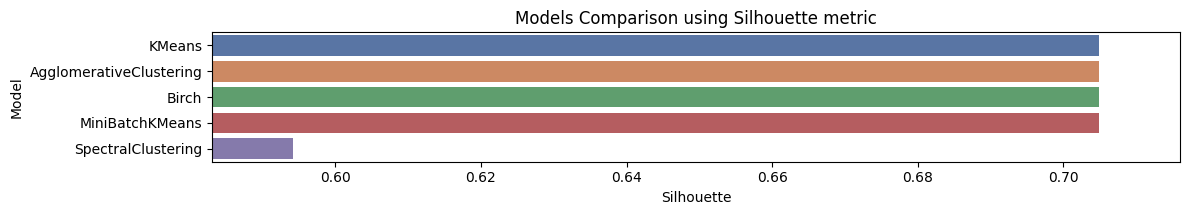

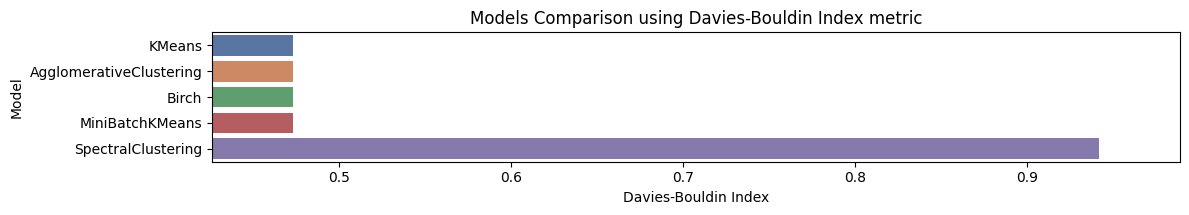

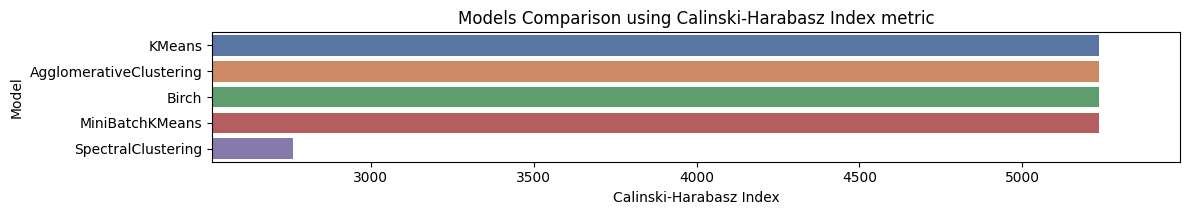

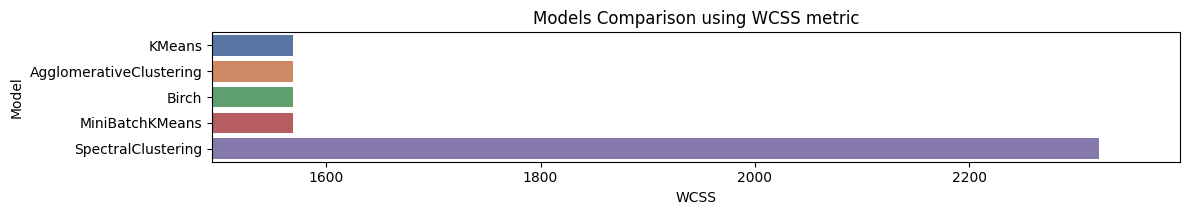

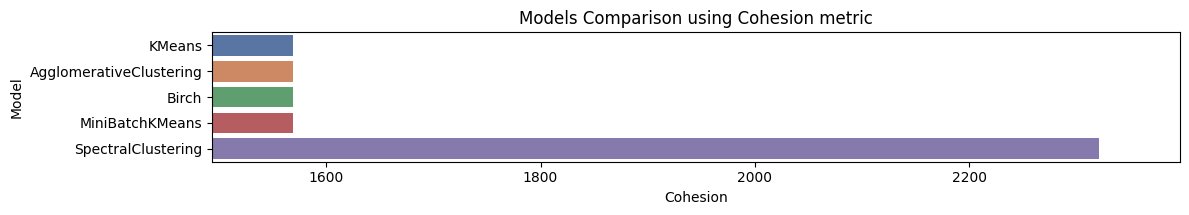

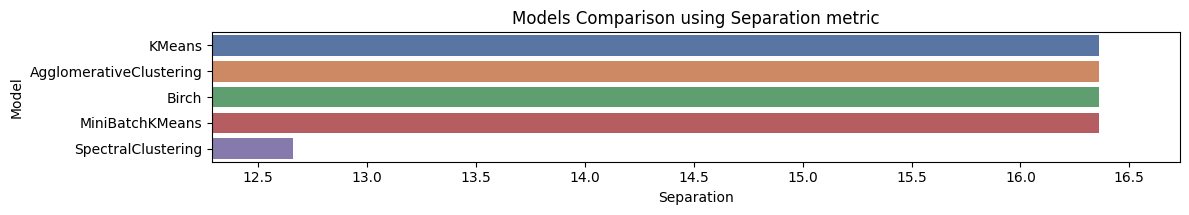

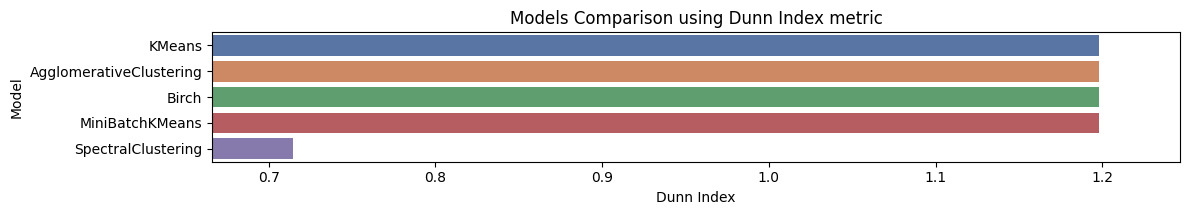

In [146]:
for metric in metrics:
    plot_bar_chart(models_result4, x=metric, y='Model', xlabel=metric, ylabel='Model', title=f"Models Comparison using {metric} metric")

In [147]:
best_models4 = get_best_model(models_result4, baseline_models, 'WCSS')
print('Best Model of Combine All Enhancements Models is:', best_models4.__class__.__name__)

Best Model of Combine All Enhancements Models is: KMeans


# Other Predictive Models

In [148]:
train_model5 = train_model4.copy()
test_model5  = test_model4.copy()

In [149]:
del train_model4, test_model4

In [150]:
from sklearn.preprocessing   import StandardScaler
from sklearn.impute          import SimpleImputer
from sklearn.pipeline        import Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.preprocessing   import OneHotEncoder

In [151]:
def get_preprocessor(df):
    numerical_features   = df.select_dtypes(include=[np.number]).columns
    categorical_features = df.select_dtypes(exclude=[np.number]).columns
    
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler',  StandardScaler())
    ])
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot',  OneHotEncoder(handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer([
        ('num', numerical_pipeline,   numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])
    
    return preprocessor

In [152]:
preprocessor = get_preprocessor(train_model5)
train_model5 = pd.DataFrame(preprocessor.fit_transform(train_model5))

In [153]:
preprocessor = get_preprocessor(test_model5)
test_model5  = pd.DataFrame(preprocessor.fit_transform(test_model5))

In [154]:
from sklearn.cluster         import KMeans, \
                                    AgglomerativeClustering, \
                                    Birch, \
                                    MiniBatchKMeans, \
                                    SpectralClustering, \
                                    FeatureAgglomeration, \
                                    AffinityPropagation, \
                                    MeanShift, \
                                    OPTICS, \
                                    DBSCAN

models = {
    'KMeans':                     KMeans(n_clusters=3),
    'AgglomerativeClustering':    AgglomerativeClustering(n_clusters=3),
    'Birch':                      Birch(n_clusters=3),
    'MiniBatchKMeans':            MiniBatchKMeans(n_clusters=3),
    'SpectralClustering':         SpectralClustering(n_clusters=3,
                                                     affinity='nearest_neighbors',
                                                     n_neighbors=5),
}

In [155]:
from sklearn.metrics         import silhouette_score, \
                                    davies_bouldin_score, \
                                    calinski_harabasz_score

def evaluate_model(X_tests, X_preds, cluster_centers, kf):
    shi, dbi, chi, wcss, coh, sep, dunn = 0, 0, 0, 0, 0, 0, 0
    for X_test, X_pred, cluster_centers_i in zip(X_tests, X_preds, cluster_centers):
        shi  += silhouette_score(X_test, X_pred)
        dbi  += davies_bouldin_score(X_test, X_pred)
        chi  += calinski_harabasz_score(X_test, X_pred)
        wcss += wcss_score(X_test, X_pred, cluster_centers_i)
        curr_coh, curr_sep = cohesion_separation(X_test, X_pred, cluster_centers_i)
        coh, sep = coh + curr_coh, sep + curr_sep
        dunn += dunn_index(X_test, X_pred, cluster_centers_i)

    result = {
        'Silhouette': shi / kf,
        'Davies-Bouldin Index': dbi / kf,
        'Calinski-Harabasz Index': chi / kf,
        'WCSS': wcss / kf,
        'Cohesion': coh / kf,
        'Separation': sep / kf,
        'Dunn Index': dunn / kf,
    }
    return result

In [156]:
from sklearn.model_selection import KFold

def run_model(model, X, kf):
    kfold = KFold(n_splits=kf, shuffle=True, random_state=42)
    X_tests, X_preds = [], []
    cluster_centers = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]

        X_pred = model.fit_predict(X_test)
        cluster_centers.append(get_cluster_centers(model, X_test, X_pred))

        X_tests.append(X_test)
        X_preds.append(X_pred)

    return X_tests, X_preds, np.asarray(cluster_centers)

In [157]:
import time

def run_models(models, X, kf=5):
    results = {}
    for name, model in models.items():
        print(f'Model {name} begining now ...')
        begin_time = time.time()
        X_tests, X_preds, cluster_centers = run_model(model, X, kf)
        results[name] = evaluate_model(X_tests, X_preds, cluster_centers, kf)        
        end_time = time.time()
        duration = round((end_time - begin_time) / 60, 2)
        print(f'Model {name} run in'.ljust(50), f'{duration} minutes')
    results = pd.DataFrame(results).T
    results = results.reset_index()
    results = results.rename(columns={'index': 'Model'})
    return results

In [158]:
models_result5 = run_models(models, train_model5)

Model KMeans begining now ...
Model KMeans run in                                0.07 minutes
Model AgglomerativeClustering begining now ...
Model AgglomerativeClustering run in               0.01 minutes
Model Birch begining now ...
Model Birch run in                                 0.01 minutes
Model MiniBatchKMeans begining now ...
Model MiniBatchKMeans run in                       0.03 minutes
Model SpectralClustering begining now ...
Model SpectralClustering run in                    0.02 minutes


In [159]:
models_result5

,Model,Silhouette,Davies-Bouldin Index,Calinski-Harabasz Index,WCSS,Cohesion,Separation,Dunn Index
0,KMeans,0.523401,0.663864,383.324451,5336.807044,5336.807044,146.274032,0.656048
1,AgglomerativeClustering,0.523401,0.663864,383.324451,5336.807044,5336.807044,146.274032,0.656048
2,Birch,0.485329,0.470740,128.398509,7574.959432,7574.959432,255.981565,1.188504
3,MiniBatchKMeans,0.530370,0.729400,370.136098,5420.893067,5420.893067,124.654562,0.633040
4,SpectralClustering,0.428953,1.231890,184.114643,7005.609127,7005.609127,123.966763,0.593990


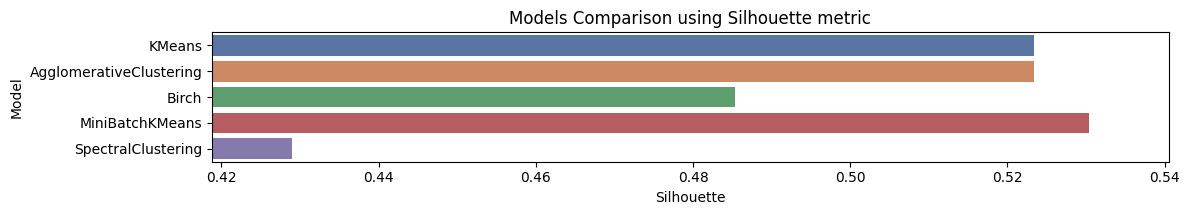

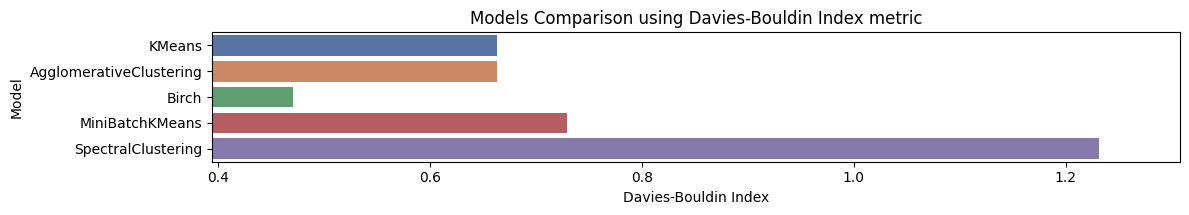

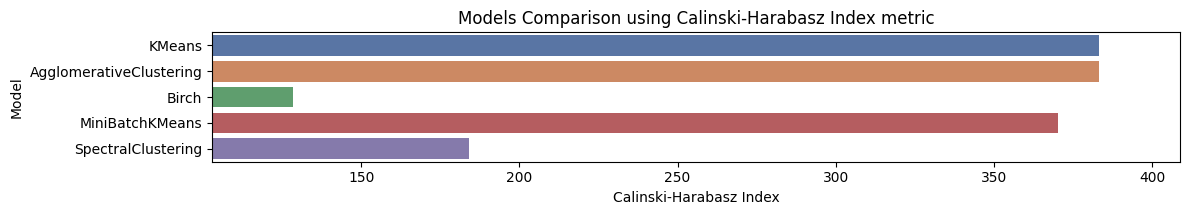

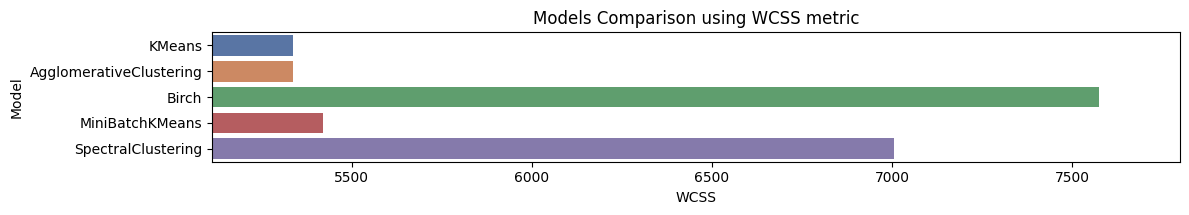

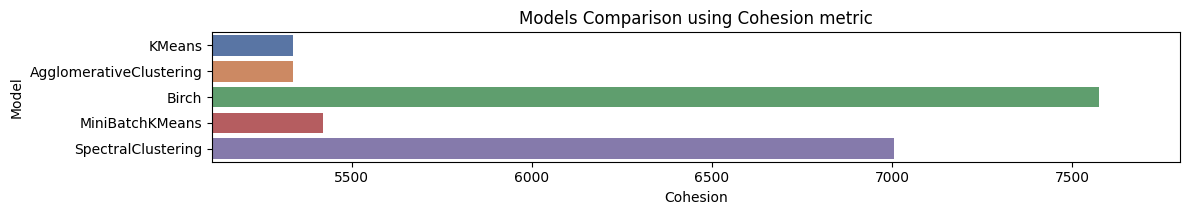

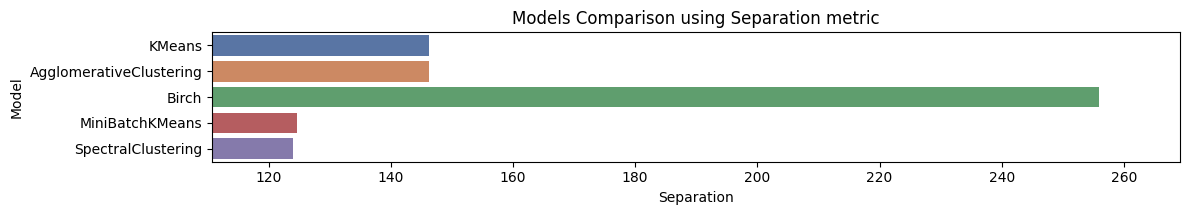

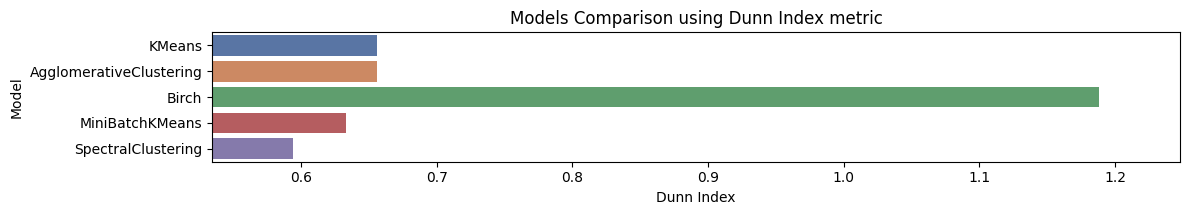

In [160]:
for metric in metrics:
    plot_bar_chart(models_result5, x=metric, y='Model', xlabel=metric, ylabel='Model', title=f"Models Comparison using {metric} metric")

In [161]:
best_models5 = get_best_model(models_result5, models, 'WCSS')
print('Best Model of Other Predictive Models is:', best_models5.__class__.__name__)

Best Model of Other Predictive Models is: KMeans


# Submission

In [162]:
test_model5.columns = test_model5.columns.astype(str)
test_model5['reordered'] = best_models5.fit_predict(test_model5)
test_ids.index = test_model5.index
test_model5 = pd.concat([test_model5, test_ids], axis=1)
reordered_products = test_model5[test_model5['reordered'] == 1]

In [163]:
submission = pd.DataFrame({
    'order_id': reordered_products['order_id'].unique(),
    'products': reordered_products.groupby('order_id')['product_id'].apply(lambda x: ' '.join(map(str, x))).values
})
submission.head()

,order_id,products
0,1285970,5818
1,1344411,21903
2,2075658,49683
3,1051003,34126
4,1205064,8631


In [164]:
submission.to_csv("submission.csv", index = False, header = True)